In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

data = pd.read_csv('/Users/yunjuha/Desktop/SROP/DXA_BIS_Project/narrowed down list/narrowed_transformed_data.csv')
df = pd.DataFrame(data)
df = df.dropna()

# Multiple Linear Regression

In [2]:
#DXA model, handgrip strength (Arms)

print("MLR: DXA Model, Handgrip Strength (Arms)")

print("\nTRANSFORMED")
columns = ['RA4DALM', 'RA4DABM', 'RA4DAFM', 'RA1PRSEX', 'RA1PF7A', 'RA1PRAGE', 'RA4P1A', 'RA4DLR3MD']
X = df[columns]
y = df['tRA4IMaxGrip']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#TRAINING
print("\nTRAINING Metrics")
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const)
results = model.fit()
print(results.summary())

#TEST
print("\nTEST Metrics")
mlr = LinearRegression()
mlr.fit(X_train, y_train)

print("\nCoefficients: ")
coefficients = pd.Series(mlr.coef_, index=X.columns)
print(coefficients)

print("\nIntercept: ")
print(mlr.intercept_)

test_pred = mlr.predict(X_test)

mlr_diff = pd.DataFrame({'\nActual value': y_test, 'Predicted value': test_pred})
mlr_diff.head()

y_train_pred = mlr.predict(X_train)
r2_train_1 = metrics.r2_score(y_train, y_train_pred)

mse_test = metrics.mean_squared_error(y_test, test_pred)
rmse_test = metrics.mean_squared_error(y_test, test_pred, squared=False)
r2_test_1 = metrics.r2_score(y_test, test_pred)

print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("R-squared:", r2_test_1)

MLR: DXA Model, Handgrip Strength (Arms)

TRANSFORMED

TRAINING Metrics
                            OLS Regression Results                            
Dep. Variable:           tRA4IMaxGrip   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     27.97
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           2.99e-28
Time:                        06:54:27   Log-Likelihood:                -210.02
No. Observations:                 195   AIC:                             438.0
Df Residuals:                     186   BIC:                             467.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [3]:
#DXA model, handgrip strength (TB)

print("MLR: DXA Model, Handgrip Strength (TB)")

columns = ['RA4IALM', 'RA4DTBBM', 'RA4DTBFM', 'RA1PRSEX', 'RA1PF7A', 'RA1PRAGE', 'RA4P1A', 'RA4DLR3MD', 'RA4DLFNMD', 'RA4DLSMD']
X = df[columns]
y = df['tRA4IMaxGrip']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

mlr = LinearRegression()
mlr.fit(X_train, y_train)

print("\nCoefficients: ")
coefficients = pd.Series(mlr.coef_, index=X.columns)
print(coefficients)

print("\nIntercept: ")
print(mlr.intercept_)

test_pred = mlr.predict(X_test)

mlr_diff = pd.DataFrame({'\nActual value': y_test, 'Predicted value': test_pred})
mlr_diff.head()

y_train_pred = mlr.predict(X_train)
r2_train_2 = metrics.r2_score(y_train, y_train_pred)
print(r2_train_2)

#evaluation metrics for the TEST set
mse_test = metrics.mean_squared_error(y_test, test_pred)
rmse_test = metrics.mean_squared_error(y_test, test_pred, squared=False)
r2_test_2 = metrics.r2_score(y_test, test_pred)

print("\nTEST set metrics:")
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("R-squared:", r2_test_2)

#to see which variables are useful...
print("\nThis is the training set metrics table")
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const)
results = model.fit()
print(results.summary())

MLR: DXA Model, Handgrip Strength (TB)

Coefficients: 
RA4IALM      0.040483
RA4DTBBM     0.000063
RA4DTBFM    -0.000011
RA1PRSEX    -0.878613
RA1PF7A     -0.114045
RA1PRAGE    -0.005633
RA4P1A       0.013625
RA4DLR3MD    0.609368
RA4DLFNMD   -0.321588
RA4DLSMD    -0.051889
dtype: float64

Intercept: 
3.988204612380628
0.5353256869429681

TEST set metrics:
MSE: 0.7795728363104281
RMSE: 0.882934219696138
R-squared: 0.38922533195099507

This is the training set metrics table
                            OLS Regression Results                            
Dep. Variable:           tRA4IMaxGrip   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     21.20
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           6.76e-26
Time:                        06:54:27   Log-Likelihood:                -212.30
No. Observations:                 195   AIC:    

In [4]:
#DXA model, jump power (Legs)

print("MLR: DXA Model, Jump Power (Legs)")

print("\nTRANSFORMED")
columns = ['RA4ILLM', 'RA4DLBM', 'RA4DLFM', 'RA1PRSEX', 'RA1PF7A', 'RA1PRAGE', 'RA4P1A', 'RA4DLFNMD']
X = df[columns]
y = df['tjumppownums']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#TRAINING
print("\nTRAINING Metrics")
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const)
results = model.fit()
print(results.summary())

#TEST
print("\nTEST Metrics")
mlr = LinearRegression()
mlr.fit(X_train, y_train)

print("\nCoefficients: ")
coefficients = pd.Series(mlr.coef_, index=X.columns)
print(coefficients)

print("\nIntercept: ")
print(mlr.intercept_)

test_pred = mlr.predict(X_test)

mlr_diff = pd.DataFrame({'\nActual value': y_test, 'Predicted value': test_pred})
mlr_diff.head()

y_train_pred = mlr.predict(X_train)
r2_train_3 = metrics.r2_score(y_train, y_train_pred)
print(r2_train_3)

mse_test = metrics.mean_squared_error(y_test, test_pred)
rmse_test = metrics.mean_squared_error(y_test, test_pred, squared=False)
r2_test_3 = metrics.r2_score(y_test, test_pred)

print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("R-squared:", r2_test_3)

MLR: DXA Model, Jump Power (Legs)

TRANSFORMED

TRAINING Metrics
                            OLS Regression Results                            
Dep. Variable:           tjumppownums   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     62.44
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           1.16e-48
Time:                        06:54:27   Log-Likelihood:                 59.888
No. Observations:                 195   AIC:                            -101.8
Df Residuals:                     186   BIC:                            -72.32
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [5]:
#DXA model, jump power (TB)

print("MLR: DXA Model, Jump Power (TB)")

print("\nTRANSFORMED")
columns = ['RA4IALM', 'RA4DTBBM', 'RA4DTBFM', 'RA1PRSEX', 'RA1PF7A', 'RA1PRAGE', 'RA4P1A', 'RA4DLR3MD', 'RA4DLFNMD', 'RA4DLSMD']
X = df[columns]
y = df['tjumppownums']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#TRAINING
print("\nTRAINING Metrics")
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const)
results = model.fit()
print(results.summary())

#TEST
print("\nTEST Metrics")
mlr = LinearRegression()
mlr.fit(X_train, y_train)

print("\nCoefficients: ")
coefficients = pd.Series(mlr.coef_, index=X.columns)
print(coefficients)

print("\nIntercept: ")
print(mlr.intercept_)

test_pred = mlr.predict(X_test)

mlr_diff = pd.DataFrame({'\nActual value': y_test, 'Predicted value': test_pred})
mlr_diff.head()

y_train_pred = mlr.predict(X_train)
r2_train_4 = metrics.r2_score(y_train, y_train_pred)
print(r2_train_4)

mse_test = metrics.mean_squared_error(y_test, test_pred)
rmse_test = metrics.mean_squared_error(y_test, test_pred, squared=False)
r2_test_4 = metrics.r2_score(y_test, test_pred)

print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("R-squared:", r2_test_4)

MLR: DXA Model, Jump Power (TB)

TRANSFORMED

TRAINING Metrics
                            OLS Regression Results                            
Dep. Variable:           tjumppownums   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     58.02
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           1.43e-51
Time:                        06:54:27   Log-Likelihood:                 71.544
No. Observations:                 195   AIC:                            -121.1
Df Residuals:                     184   BIC:                            -85.08
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [6]:
#BIS Model, handgrip strength

print("MLR: BIS Model, Handgrip Strength")

columns = ['RA4IMECF', 'RA4IMICF', 'RA4IMFFM', 'RA4DTBFM', 'RA4IRES0', 'RA4IRESINF', 'RA4IRESEXC', 'RA4IRESINC', 'RA4IFCHAR', 'RA4IMCAP', 'RA1PRSEX', 'RA1PF7A', 'RA1PRAGE', 'RA4P1A']
X = df[columns]
y = df['tRA4IMaxGrip']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

mlr = LinearRegression()
mlr.fit(X_train, y_train)

print("\nCoefficients: ")
coefficients = pd.Series(mlr.coef_, index=X.columns)
print(coefficients)

print("\nIntercept: ")
print(mlr.intercept_)

test_pred = mlr.predict(X_test)

mlr_diff = pd.DataFrame({'\nActual value': y_test, 'Predicted value': test_pred})
mlr_diff.head()

y_train_pred = mlr.predict(X_train)
r2_train_5 = metrics.r2_score(y_train, y_train_pred)
print(r2_train_5)

#evaluation metrics for the TEST set
mse_test = metrics.mean_squared_error(y_test, test_pred)
rmse_test = metrics.mean_squared_error(y_test, test_pred, squared=False)
r2_test_5 = metrics.r2_score(y_test, test_pred)

print("\nTEST set metrics:")
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("R-squared:", r2_test_5)

#to see which variables are useful...
print("\nThis is the training set metrics table")
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const)
results = model.fit()
print(results.summary())

MLR: BIS Model, Handgrip Strength

Coefficients: 
RA4IMECF      3.765241
RA4IMICF      3.748699
RA4IMFFM     -2.727381
RA4DTBFM     -0.000009
RA4IRES0     -0.002937
RA4IRESINF    0.015752
RA4IRESEXC   -0.002937
RA4IRESINC   -0.002184
RA4IFCHAR     0.011232
RA4IMCAP     -0.197972
RA1PRSEX     -0.936667
RA1PF7A      -0.051957
RA1PRAGE     -0.003013
RA4P1A        0.017037
dtype: float64

Intercept: 
3.2638866072032053
0.5511005231471688

TEST set metrics:
MSE: 0.7513691476622152
RMSE: 0.8668155211244288
R-squared: 0.4113221749520899

This is the training set metrics table
                            OLS Regression Results                            
Dep. Variable:           tRA4IMaxGrip   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     17.09
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           3.19e-25
Time:                        

In [237]:
#BIS Model, jumppower

print("MLR: BIS Model, Jump Power")

columns = ['RA4IMECF', 'RA4IMICF', 'RA4IMFFM', 'RA4DTBFM', 'RA4IRES0', 'RA4IRESINF', 'RA4IRESEXC', 'RA4IRESINC', 'RA4IFCHAR', 'RA4IMCAP', 'RA1PRSEX', 'RA1PF7A', 'RA1PRAGE', 'RA4P1A']
X = df[columns]
y = df['tjumppownums']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

mlr = LinearRegression()
mlr.fit(X_train, y_train)

#to see which variables are useful...
print("\nThis is the training set metrics table")
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const)
results = model.fit()
print(results.summary())

print("\nCoefficients: ")
coefficients = pd.Series(mlr.coef_, index=X.columns)
print(coefficients)

print("\nIntercept: ")
print(mlr.intercept_)

test_pred = mlr.predict(X_test)

mlr_diff = pd.DataFrame({'\nActual value': y_test, 'Predicted value': test_pred})
mlr_diff.head()

y_train_pred = mlr.predict(X_train)
r2_train_6 = metrics.r2_score(y_train, y_train_pred)
print(r2_train_6)

#evaluation metrics for the TEST set
mse_test = metrics.mean_squared_error(y_test, test_pred)
rmse_test = metrics.mean_squared_error(y_test, test_pred, squared=False)
r2_test_6 = metrics.r2_score(y_test, test_pred)

print("\nTEST set metrics:")
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("R-squared:", r2_test_6)



MLR: BIS Model, Jump Power

This is the training set metrics table
                            OLS Regression Results                            
Dep. Variable:           tjumppownums   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     44.05
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           4.69e-49
Time:                        10:17:40   Log-Likelihood:                 71.795
No. Observations:                 195   AIC:                            -115.6
Df Residuals:                     181   BIC:                            -69.77
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [8]:
#Combo Models, handgrip strength (Arms)
print("MLR: Combo Models, Handgrip Strength (Arms)")

print("\nTRANSFORMED")
columns = ['RA4DALM', 'RA4DABM', 'RA4DAFM', 'RA1PRSEX', 'RA1PF7A', 'RA1PRAGE', 'RA4P1A', 'RA4DLR3MD', 'RA4IMECF', 'RA4IMICF', 'RA4IMFFM', 'RA4DTBFM', 'RA4IRES0', 'RA4IRESINF', 'RA4IRESEXC', 'RA4IRESINC', 'RA4IFCHAR', 'RA4IMCAP']
X = df[columns]
y = df['tRA4IMaxGrip']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#TRAINING
print("\nTRAINING Metrics")
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const)
results = model.fit()
print(results.summary())

#TEST
print("\nTEST Metrics")
mlr = LinearRegression()
mlr.fit(X_train, y_train)

print("\nCoefficients: ")
coefficients = pd.Series(mlr.coef_, index=X.columns)
print(coefficients)

print("\nIntercept: ")
print(mlr.intercept_)

test_pred = mlr.predict(X_test)

mlr_diff = pd.DataFrame({'\nActual value': y_test, 'Predicted value': test_pred})
mlr_diff.head()

y_train_pred = mlr.predict(X_train)
r2_train_7 = metrics.r2_score(y_train, y_train_pred)
print(r2_train_7)

mse_test = metrics.mean_squared_error(y_test, test_pred)
rmse_test = metrics.mean_squared_error(y_test, test_pred, squared=False)
r2_test_7 = metrics.r2_score(y_test, test_pred)

print("\nTEST set metrics:")
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("R-squared:", r2_test_7)

MLR: Combo Models, Handgrip Strength (Arms)

TRANSFORMED

TRAINING Metrics
                            OLS Regression Results                            
Dep. Variable:           tRA4IMaxGrip   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     13.61
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           4.43e-24
Time:                        06:54:28   Log-Likelihood:                -205.50
No. Observations:                 195   AIC:                             447.0
Df Residuals:                     177   BIC:                             505.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [9]:
#Combo Models, handgrip strength (TB)

print("MLR: Combo Models, Handgrip Strength (TB)")

columns = ['RA4IALM', 'RA4DTBBM', 'RA4DTBFM', 'RA1PRSEX', 'RA1PF7A', 'RA1PRAGE', 'RA4P1A', 'RA4DLR3MD', 'RA4DLFNMD', 'RA4DLSMD', 'RA4IMECF', 'RA4IMICF','RA4IMFFM', 'RA4DTBFM', 'RA4IRES0', 'RA4IRESINF', 'RA4IRESEXC', 'RA4IRESINC', 'RA4IFCHAR', 'RA4IMCAP'] 
X = df[columns]
y = df['tRA4IMaxGrip']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

mlr = LinearRegression()
mlr.fit(X_train, y_train)

print("\nCoefficients: ")
coefficients = pd.Series(mlr.coef_, index=X.columns)
print(coefficients)

print("\nIntercept: ")
print(mlr.intercept_)

test_pred = mlr.predict(X_test)

mlr_diff = pd.DataFrame({'\nActual value': y_test, 'Predicted value': test_pred})
mlr_diff.head()

y_train_pred = mlr.predict(X_train)
r2_train_8 = metrics.r2_score(y_train, y_train_pred)
print(r2_train_8)

#evaluation metrics for the TEST set
mse_test = metrics.mean_squared_error(y_test, test_pred)
rmse_test = metrics.mean_squared_error(y_test, test_pred, squared=False)
r2_test_8 = metrics.r2_score(y_test, test_pred)

print("\nTEST set metrics:")
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("R-squared:", r2_test_8)

#to see which variables are useful...
print("\nThis is the training set metrics table")
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const)
results = model.fit()
print(results.summary())

MLR: Combo Models, Handgrip Strength (TB)

Coefficients: 
RA4IALM       0.010349
RA4DTBBM      0.000123
RA4DTBFM     -0.000005
RA1PRSEX     -0.802640
RA1PF7A      -0.065564
RA1PRAGE     -0.003716
RA4P1A        0.014253
RA4DLR3MD     0.482962
RA4DLFNMD    -0.569628
RA4DLSMD      0.014931
RA4IMECF      5.595835
RA4IMICF      5.546423
RA4IMFFM     -4.058206
RA4DTBFM     -0.000005
RA4IRES0     -0.001552
RA4IRESINF    0.010784
RA4IRESEXC   -0.001552
RA4IRESINC   -0.001911
RA4IFCHAR     0.010665
RA4IMCAP     -0.227431
dtype: float64

Intercept: 
3.475332673790441
0.5543973854886928

TEST set metrics:
MSE: 0.7455836937946568
RMSE: 0.863471883615591
R-squared: 0.415854924813148

This is the training set metrics table
                            OLS Regression Results                            
Dep. Variable:           tRA4IMaxGrip   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-st

In [10]:
#Combo Models, jumppower (Legs)

print("MLR: Combo Models, Jump Power (Legs)")

print("\nTRANSFORMED")
columns = ['RA4ILLM', 'RA4DLBM', 'RA4DLFM', 'RA1PRSEX', 'RA1PF7A', 'RA1PRAGE', 'RA4P1A', 'RA4DLFNMD', 'RA4IMECF', 'RA4IMICF', 'RA4IMFFM', 'RA4DTBFM', 'RA4IRES0', 'RA4IRESINF', 'RA4IRESEXC', 'RA4IRESINC', 'RA4IFCHAR', 'RA4IMCAP']
X = df[columns]
y = df['tjumppownums']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#TRAINING
print("\nTRAINING Metrics")
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const)
results = model.fit()
print(results.summary())

#TEST
print("\nTEST Metrics")
mlr = LinearRegression()
mlr.fit(X_train, y_train)

print("\nCoefficients: ")
coefficients = pd.Series(mlr.coef_, index=X.columns)
print(coefficients)

print("\nIntercept: ")
print(mlr.intercept_)

test_pred = mlr.predict(X_test)

mlr_diff = pd.DataFrame({'\nActual value': y_test, 'Predicted value': test_pred})
mlr_diff.head()

y_train_pred = mlr.predict(X_train)
r2_train_9 = metrics.r2_score(y_train, y_train_pred)
print(r2_train_9)

mse_test = metrics.mean_squared_error(y_test, test_pred)
rmse_test = metrics.mean_squared_error(y_test, test_pred, squared=False)
r2_test_9 = metrics.r2_score(y_test, test_pred)

print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("R-squared:", r2_test_9)


MLR: Combo Models, Jump Power (Legs)

TRANSFORMED

TRAINING Metrics
                            OLS Regression Results                            
Dep. Variable:           tjumppownums   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     40.39
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           8.96e-52
Time:                        06:54:28   Log-Likelihood:                 87.240
No. Observations:                 195   AIC:                            -138.5
Df Residuals:                     177   BIC:                            -79.57
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [11]:
#Combo Models, jumppower (TB)

print("MLR: Combo Models, Jump Power (TB)")

columns = ['RA4IALM', 'RA4DTBBM', 'RA4DTBFM', 'RA1PRSEX', 'RA1PF7A', 'RA1PRAGE', 'RA4P1A', 'RA4DLR3MD', 'RA4DLFNMD', 'RA4DLSMD', 'RA4IMECF', 'RA4IMICF','RA4IMFFM', 'RA4DTBFM', 'RA4IRES0', 'RA4IRESINF', 'RA4IRESEXC', 'RA4IRESINC', 'RA4IFCHAR', 'RA4IMCAP'] 
X = df[columns]
y = df['tjumppownums']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

mlr = LinearRegression()
mlr.fit(X_train, y_train)

print("\nCoefficients: ")
coefficients = pd.Series(mlr.coef_, index=X.columns)
print(coefficients)

print("\nIntercept: ")
print(mlr.intercept_)

test_pred = mlr.predict(X_test)

mlr_diff = pd.DataFrame({'\nActual value': y_test, 'Predicted value': test_pred})
mlr_diff.head()

y_train_pred = mlr.predict(X_train)
r2_train_10 = metrics.r2_score(y_train, y_train_pred)
print(r2_train_10)

#evaluation metrics for the TEST set
mse_test = metrics.mean_squared_error(y_test, test_pred)
rmse_test = metrics.mean_squared_error(y_test, test_pred, squared=False)
r2_test_10 = metrics.r2_score(y_test, test_pred)

print("\nTEST set metrics:")
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("R-squared:", r2_test_10)

#to see which variables are useful...
print("\nThis is the training set metrics table")
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const)
results = model.fit()
print(results.summary())


MLR: Combo Models, Jump Power (TB)

Coefficients: 
RA4IALM       0.043736
RA4DTBBM      0.000071
RA4DTBFM     -0.000002
RA1PRSEX     -0.203449
RA1PF7A      -0.071792
RA1PRAGE     -0.004582
RA4P1A        0.003021
RA4DLR3MD     0.087476
RA4DLFNMD     0.306781
RA4DLSMD     -0.252583
RA4IMECF     -4.058197
RA4IMICF     -3.929188
RA4IMFFM      2.911059
RA4DTBFM     -0.000002
RA4IRES0     -0.003409
RA4IRESINF    0.012872
RA4IRESEXC   -0.003409
RA4IRESINC   -0.001082
RA4IFCHAR    -0.001586
RA4IMCAP     -0.096820
dtype: float64

Intercept: 
0.7183792623787562
0.8036027314943542

TEST set metrics:
MSE: 0.026423626598990543
RMSE: 0.1625534576654417
R-squared: 0.8152866675394634

This is the training set metrics table
                            OLS Regression Results                            
Dep. Variable:           tjumppownums   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-stat

# Random Forest

In [12]:
#DXA model, handgrip strength (Arms)

print("Random Forest: DXA Model, Handgrip Strength (Arms)")

print("\nTRANSFORMED")
columns = ['RA4DALM', 'RA4DABM', 'RA4DAFM', 'RA1PRSEX', 'RA1PF7A', 'RA1PRAGE', 'RA4P1A', 'RA4DLR3MD']
X = df[columns]
y = df['tRA4IMaxGrip']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#random forest model
param_grid = {
    'n_estimators': [5, 10, 20],
    'max_depth': [None, 1, 2, 4, 8, 16],
    'min_samples_split': [1, 2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [1, 2, 4, 8, X_train.shape[1]]
}

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
print("Best parameters:", best_params)
print("Mean Squared Error:", mse)

#fitting with BEST HYPERPARAMETERS
rf = RandomForestRegressor(max_depth = best_params['max_depth'],
                           min_samples_leaf = best_params['min_samples_leaf'], 
                           min_samples_split = best_params['min_samples_split'], 
                           n_estimators = best_params['n_estimators'], 
                           max_features = best_params['max_features'],random_state = 42)
rf.fit(X_train, y_train)

#evaluation of the model on the TRAINING set
y_train_pred = rf.predict(X_train)
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
r2_train_11 = metrics.r2_score(y_train, y_train_pred)
print("\nTrain set metrics:")
print("MSE:", mse_train)
print("R-squared:", r2_train_11)

y_test_pred = rf.predict(X_test)

#evaluation of the model on test set
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
r2_test_11 = metrics.r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("\nTest set metrics:")
print("MSE:", mse_test)
print("R-squared:", r2_test_11, "\n")

#feature importance??
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importances)

Random Forest: DXA Model, Handgrip Strength (Arms)

TRANSFORMED
Best parameters: {'max_depth': 2, 'max_features': 4, 'min_samples_leaf': 4, 'min_samples_split': 20, 'n_estimators': 20}
Mean Squared Error: 0.8453109602699342

Train set metrics:
MSE: 0.4803139343571503
R-squared: 0.5680009155404571

Test set metrics:
MSE: 0.8453109602699342
R-squared: 0.33772125308960266 

RA4DALM      0.077837
RA4DABM      0.252100
RA4DAFM      0.008570
RA1PRSEX     0.519517
RA1PF7A      0.000000
RA1PRAGE     0.010709
RA4P1A       0.099691
RA4DLR3MD    0.031575
dtype: float64


In [13]:
#DXA model, handgrip strength (TB)

print("Random Forest: DXA Model, Handgrip Strength (TB)")

columns = ['RA4IALM', 'RA4DTBBM', 'RA4DTBFM', 'RA1PRSEX', 'RA1PF7A', 'RA1PRAGE', 'RA4P1A', 'RA4DLR3MD', 'RA4DLFNMD', 'RA4DLSMD']
X = df[columns]
y = df['tRA4IMaxGrip']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#random forest model
param_grid = {
    'n_estimators': [5, 10, 20],
    'max_depth': [None, 1, 2, 4, 8, 16],
    'min_samples_split': [1, 2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [1, 2, 4, 8, X_train.shape[1]]
}

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
print("Best parameters:", best_params)
print("Mean Squared Error:", mse)

#fitting with BEST HYPERPARAMETERS
rf = RandomForestRegressor(max_depth = best_params['max_depth'],
                           min_samples_leaf = best_params['min_samples_leaf'], 
                           min_samples_split = best_params['min_samples_split'], 
                           n_estimators = best_params['n_estimators'], 
                           max_features = best_params['max_features'],random_state = 42)
rf.fit(X_train, y_train)

#evaluation of the model on the TRAINING set
y_train_pred = rf.predict(X_train)
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
r2_train_12 = metrics.r2_score(y_train, y_train_pred)
print("\nTrain set metrics:")
print("MSE:", mse_train)
print("R-squared:", r2_train_12)

#evaluation of the model on TEST set
y_test_pred = rf.predict(X_test)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
r2_test_12 = metrics.r2_score(y_test, y_test_pred)
print("\nTest set metrics:")
print("MSE:", mse_test)
print("R-squared:", r2_test_12, "\n")

#feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importances)

Random Forest: DXA Model, Handgrip Strength (TB)
Best parameters: {'max_depth': 1, 'max_features': 8, 'min_samples_leaf': 1, 'min_samples_split': 1, 'n_estimators': 10}
Mean Squared Error: 0.8382982236469825

Train set metrics:
MSE: 0.557071805607021
R-squared: 0.49896412994441175

Test set metrics:
MSE: 0.8382982236469825
R-squared: 0.3432155464814427 

RA4IALM      0.0
RA4DTBBM     0.1
RA4DTBFM     0.0
RA1PRSEX     0.7
RA1PF7A      0.0
RA1PRAGE     0.0
RA4P1A       0.2
RA4DLR3MD    0.0
RA4DLFNMD    0.0
RA4DLSMD     0.0
dtype: float64


In [14]:
#DXA model, jump power (Legs)

print("Random Forest: DXA Model, Jump Power (Legs)")

print("\nTRANSFORMED")
columns = ['RA4ILLM', 'RA4DLBM', 'RA4DLFM', 'RA1PRSEX', 'RA1PF7A', 'RA1PRAGE', 'RA4P1A', 'RA4DLFNMD']
X = df[columns]
y = df['tjumppownums']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#random forest model
param_grid = {
    'n_estimators': [5, 10, 20],
    'max_depth': [None, 1, 2, 4, 8, 16],
    'min_samples_split': [1, 2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [1, 2, 4, 8, X_train.shape[1]]
}

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
print("Best parameters:", best_params)
print("Mean Squared Error:", mse)

#fitting with BEST HYPERPARAMETERS
rf = RandomForestRegressor(max_depth = best_params['max_depth'],
                           min_samples_leaf = best_params['min_samples_leaf'], 
                           min_samples_split = best_params['min_samples_split'], 
                           n_estimators = best_params['n_estimators'], 
                           max_features = best_params['max_features'],random_state = 42)
rf.fit(X_train, y_train)

#evaluation of the model on the TRAINING set
y_train_pred = rf.predict(X_train)
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
r2_train_13 = metrics.r2_score(y_train, y_train_pred)
print("\nTrain set metrics:")
print("MSE:", mse_train)
print("R-squared:", r2_train_13)

y_test_pred = rf.predict(X_test)

#evaluation of the model on test set
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
r2_test_13 = metrics.r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("\nTest set metrics:")
print("MSE:", mse_test)
print("R-squared:", r2_test_13, "\n")

#feature importance??
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importances)

Random Forest: DXA Model, Jump Power (Legs)

TRANSFORMED
Best parameters: {'max_depth': None, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 20}
Mean Squared Error: 0.03356148427992688

Train set metrics:
MSE: 0.012531617696053555
R-squared: 0.8926629029271761

Test set metrics:
MSE: 0.03356148427992688
R-squared: 0.7653897514618968 

RA4ILLM      0.359982
RA4DLBM      0.224947
RA4DLFM      0.074646
RA1PRSEX     0.011208
RA1PF7A      0.004145
RA1PRAGE     0.103039
RA4P1A       0.138292
RA4DLFNMD    0.083741
dtype: float64


In [15]:
#DXA model, jump power (TB)

print("Random Forest: DXA Model, Jump Power (TB)")

columns = ['RA4IALM', 'RA4DTBBM', 'RA4DTBFM', 'RA1PRSEX', 'RA1PF7A', 'RA1PRAGE', 'RA4P1A', 'RA4DLR3MD', 'RA4DLFNMD', 'RA4DLSMD']
X = df[columns]
y = df['tjumppownums']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#random forest model
param_grid = {
    'n_estimators': [5, 10, 20],
    'max_depth': [None, 1, 2, 4, 8, 16],
    'min_samples_split': [1, 2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [1, 2, 4, 8, X_train.shape[1]]
}

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
print("Best parameters:", best_params)
print("Mean Squared Error:", mse)

#fitting with BEST HYPERPARAMETERS
rf = RandomForestRegressor(max_depth = best_params['max_depth'],
                           min_samples_leaf = best_params['min_samples_leaf'], 
                           min_samples_split = best_params['min_samples_split'], 
                           n_estimators = best_params['n_estimators'], 
                           max_features = best_params['max_features'],random_state = 42)
rf.fit(X_train, y_train)

#evaluation of the model on the TRAINING set
y_train_pred = rf.predict(X_train)
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
r2_train_14 = metrics.r2_score(y_train, y_train_pred)
print("\nTrain set metrics:")
print("MSE:", mse_train)
print("R-squared:", r2_train_14)

#evaluation of the model on TEST set
y_test_pred = rf.predict(X_test)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
r2_test_14 = metrics.r2_score(y_test, y_test_pred)
print("\nTest set metrics:")
print("MSE:", mse_test)
print("R-squared:", r2_test_14, "\n")

#feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importances)

Random Forest: DXA Model, Jump Power (TB)
Best parameters: {'max_depth': 8, 'max_features': 8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 20}
Mean Squared Error: 0.03530682194417624

Train set metrics:
MSE: 0.010377444843963041
R-squared: 0.911114045161534

Test set metrics:
MSE: 0.03530682194417624
R-squared: 0.7531890365061116 

RA4IALM      0.498600
RA4DTBBM     0.177128
RA4DTBFM     0.048116
RA1PRSEX     0.001632
RA1PF7A      0.001393
RA1PRAGE     0.102928
RA4P1A       0.044908
RA4DLR3MD    0.044216
RA4DLFNMD    0.037704
RA4DLSMD     0.043376
dtype: float64


In [16]:
#BIS Model, handgrip strength

print("Random Forest: BIS Model, Handgrip Strength")

columns = ['RA4IMECF', 'RA4IMICF', 'RA4IMFFM', 'RA4DTBFM', 'RA4IRES0', 'RA4IRESINF', 'RA4IRESEXC', 'RA4IRESINC', 'RA4IFCHAR', 'RA4IMCAP', 'RA1PRSEX', 'RA1PF7A', 'RA1PRAGE', 'RA4P1A']
X = df[columns]
y = df['tRA4IMaxGrip']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#random forest model
param_grid = {
    'n_estimators': [5, 10, 20],
    'max_depth': [None, 1, 2, 4, 8, 16],
    'min_samples_split': [1, 2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [1, 2, 4, 8, X_train.shape[1]]
}

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
print("Best parameters:", best_params)
print("Mean Squared Error:", mse)

#fitting with BEST HYPERPARAMETERS
rf = RandomForestRegressor(max_depth = best_params['max_depth'],
                           min_samples_leaf = best_params['min_samples_leaf'], 
                           min_samples_split = best_params['min_samples_split'], 
                           n_estimators = best_params['n_estimators'], 
                           max_features = best_params['max_features'],random_state = 42)
rf.fit(X_train, y_train)

y_test_pred = rf.predict(X_test)

#evaluation of the model on test set
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
r2_test_15 = metrics.r2_score(y_test, y_test_pred)

#evaluation of the model on the TRAINING set
y_train_pred = rf.predict(X_train)
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
r2_train_15 = metrics.r2_score(y_train, y_train_pred)
print("\nTrain set metrics:")
print("MSE:", mse_train)
print("R-squared:", r2_train_15)

# Print the evaluation metrics
print("\nTest set metrics:")
print("MSE:", mse_test)
print("R-squared:", r2_test_15, "\n")

#feature importance??
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importances)

Random Forest: BIS Model, Handgrip Strength
Best parameters: {'max_depth': 2, 'max_features': 14, 'min_samples_leaf': 8, 'min_samples_split': 1, 'n_estimators': 20}
Mean Squared Error: 0.8249587418407084

Train set metrics:
MSE: 0.4937616312501795
R-squared: 0.5559059244724729

Test set metrics:
MSE: 0.8249587418407084
R-squared: 0.3536666771426046 

RA4IMECF      0.012043
RA4IMICF      0.007234
RA4IMFFM      0.003927
RA4DTBFM      0.004719
RA4IRES0      0.000000
RA4IRESINF    0.006229
RA4IRESEXC    0.000000
RA4IRESINC    0.043678
RA4IFCHAR     0.002883
RA4IMCAP      0.010221
RA1PRSEX      0.844364
RA1PF7A       0.000000
RA1PRAGE      0.012053
RA4P1A        0.052648
dtype: float64


In [17]:
#BIS Model, jumppower

print("Random Forest: BIS Model, Jump Power")

columns = ['RA4IMECF', 'RA4IMICF', 'RA4IMFFM', 'RA4DTBFM', 'RA4IRES0', 'RA4IRESINF', 'RA4IRESEXC', 'RA4IRESINC', 'RA4IFCHAR', 'RA4IMCAP', 'RA1PRSEX', 'RA1PF7A', 'RA1PRAGE', 'RA4P1A']
X = df[columns]
y = df['tjumppownums']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#random forest model
param_grid = {
    'n_estimators': [5, 10, 20],
    'max_depth': [None, 1, 2, 4, 8, 16],
    'min_samples_split': [1, 2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [1, 2, 4, 8, X_train.shape[1]]
}

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
print("Best parameters:", best_params)
print("Mean Squared Error:", mse)

#fitting with BEST HYPERPARAMETERS
rf = RandomForestRegressor(max_depth = best_params['max_depth'],
                           min_samples_leaf = best_params['min_samples_leaf'], 
                           min_samples_split = best_params['min_samples_split'], 
                           n_estimators = best_params['n_estimators'], 
                           max_features = best_params['max_features'],random_state = 42)
rf.fit(X_train, y_train)

#evaluation of the model on the TRAINING set
y_train_pred = rf.predict(X_train)
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
r2_train_16 = metrics.r2_score(y_train, y_train_pred)
print("\nTrain set metrics:")
print("MSE:", mse_train)
print("R-squared:", r2_train_16)

y_test_pred = rf.predict(X_test)

#evaluation of the model on test set
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
r2_test_16 = metrics.r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("\nTest set metrics:")
print("MSE:", mse_test)
print("R-squared:", r2_test_16, "\n")

#feature importance??
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importances)

Random Forest: BIS Model, Jump Power
Best parameters: {'max_depth': 8, 'max_features': 8, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 20}
Mean Squared Error: 0.053575055291479975

Train set metrics:
MSE: 0.008986825283545578
R-squared: 0.9230251224356918

Test set metrics:
MSE: 0.053575055291479975
R-squared: 0.6254856628944028 

RA4IMECF      0.052795
RA4IMICF      0.180074
RA4IMFFM      0.086669
RA4DTBFM      0.030104
RA4IRES0      0.017711
RA4IRESINF    0.024545
RA4IRESEXC    0.024944
RA4IRESINC    0.221068
RA4IFCHAR     0.031833
RA4IMCAP      0.151752
RA1PRSEX      0.020517
RA1PF7A       0.002002
RA1PRAGE      0.082313
RA4P1A        0.073674
dtype: float64


In [18]:
#Combo Models, handgrip strength (Arms)
print("Random Forest: Combo Models, Handgrip Strength (Arms)")

print("\nTRANSFORMED")
columns = ['RA4DALM', 'RA4DABM', 'RA4DAFM', 'RA1PRSEX', 'RA1PF7A', 'RA1PRAGE', 'RA4P1A', 'RA4DLR3MD', 'RA4IMECF', 'RA4IMICF', 'RA4IMFFM', 'RA4DTBFM', 'RA4IRES0', 'RA4IRESINF', 'RA4IRESEXC', 'RA4IRESINC', 'RA4IFCHAR', 'RA4IMCAP']
X = df[columns]
y = df['tRA4IMaxGrip']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#random forest model
param_grid = {
    'n_estimators': [5, 10, 20],
    'max_depth': [None, 1, 2, 4, 8, 16],
    'min_samples_split': [1, 2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [1, 2, 4, 8, X_train.shape[1]]
}

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
print("Best parameters:", best_params)
print("Mean Squared Error:", mse)

#fitting with BEST HYPERPARAMETERS
rf = RandomForestRegressor(max_depth = best_params['max_depth'],
                           min_samples_leaf = best_params['min_samples_leaf'], 
                           min_samples_split = best_params['min_samples_split'], 
                           n_estimators = best_params['n_estimators'], 
                           max_features = best_params['max_features'],random_state = 42)
rf.fit(X_train, y_train)

#evaluation of the model on the TRAINING set
y_train_pred = rf.predict(X_train)
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
r2_train_17 = metrics.r2_score(y_train, y_train_pred)
print("\nTrain set metrics:")
print("MSE:", mse_train)
print("R-squared:", r2_train_17)

y_test_pred = rf.predict(X_test)

#evaluation of the model on test set
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
r2_test_17 = metrics.r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("\nTest set metrics:")
print("MSE:", mse_test)
print("R-squared:", r2_test_17, "\n")

#feature importance??
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importances)

Random Forest: Combo Models, Handgrip Strength (Arms)

TRANSFORMED
Best parameters: {'max_depth': 4, 'max_features': 18, 'min_samples_leaf': 4, 'min_samples_split': 1, 'n_estimators': 5}
Mean Squared Error: 0.8550286349674537

Train set metrics:
MSE: 0.3616000139290039
R-squared: 0.6747733851049742

Test set metrics:
MSE: 0.8550286349674537
R-squared: 0.33010771236430436 

RA4DALM       0.041410
RA4DABM       0.138831
RA4DAFM       0.027106
RA1PRSEX      0.548695
RA1PF7A       0.000000
RA1PRAGE      0.025240
RA4P1A        0.040591
RA4DLR3MD     0.035548
RA4IMECF      0.007749
RA4IMICF      0.000000
RA4IMFFM      0.000000
RA4DTBFM      0.011862
RA4IRES0      0.008982
RA4IRESINF    0.016824
RA4IRESEXC    0.000000
RA4IRESINC    0.051998
RA4IFCHAR     0.013524
RA4IMCAP      0.031641
dtype: float64


In [19]:
#Combo Models, handgrip strength (TB)

print("Random Forest: Combo Models, Handgrip Strength (TB)")

columns = ['RA4IALM', 'RA4DTBBM', 'RA4DTBFM', 'RA1PRSEX', 'RA1PF7A', 'RA1PRAGE', 'RA4P1A', 'RA4DLR3MD', 'RA4DLFNMD', 'RA4DLSMD', 'RA4IMECF', 'RA4IMICF','RA4IMFFM', 'RA4DTBFM', 'RA4IRES0', 'RA4IRESINF', 'RA4IRESEXC', 'RA4IRESINC', 'RA4IFCHAR', 'RA4IMCAP'] 
X = df[columns]
y = df['tRA4IMaxGrip']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#random forest model
param_grid = {
    'n_estimators': [5, 10, 20],
    'max_depth': [None, 1, 2, 4, 8, 16],
    'min_samples_split': [1, 2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [1, 2, 4, 8, X_train.shape[1]]
}

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
print("Best parameters:", best_params)
print("Mean Squared Error:", mse)

#fitting with BEST HYPERPARAMETERS
rf = RandomForestRegressor(max_depth = best_params['max_depth'],
                           min_samples_leaf = best_params['min_samples_leaf'], 
                           min_samples_split = best_params['min_samples_split'], 
                           n_estimators = best_params['n_estimators'], 
                           max_features = best_params['max_features'],random_state = 42)
rf.fit(X_train, y_train)

#evaluation of the model on the TRAINING set
y_train_pred = rf.predict(X_train)
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
r2_train_18 = metrics.r2_score(y_train, y_train_pred)
print("\nTrain set metrics:")
print("MSE:", mse_train)
print("R-squared:", r2_train_18)

#evaluation of the model on test set
y_test_pred = rf.predict(X_test)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
r2_test_18 = metrics.r2_score(y_test, y_test_pred)
print("\nTest set metrics:")
print("MSE:", mse_test)
print("R-squared:", r2_test_18, "\n")

#feature importance??
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importances)

Random Forest: Combo Models, Handgrip Strength (TB)
Best parameters: {'max_depth': 4, 'max_features': 20, 'min_samples_leaf': 4, 'min_samples_split': 20, 'n_estimators': 10}
Mean Squared Error: 0.8517500698491522

Train set metrics:
MSE: 0.3744405015387585
R-squared: 0.663224524048398

Test set metrics:
MSE: 0.8517500698491522
R-squared: 0.33267638129238675 

RA4IALM       0.000000
RA4DTBBM      0.028363
RA4DTBFM      0.009721
RA1PRSEX      0.684707
RA1PF7A       0.005388
RA1PRAGE      0.013384
RA4P1A        0.032009
RA4DLR3MD     0.050911
RA4DLFNMD     0.013119
RA4DLSMD      0.003451
RA4IMECF      0.016146
RA4IMICF      0.006422
RA4IMFFM      0.000000
RA4DTBFM      0.013233
RA4IRES0      0.004092
RA4IRESINF    0.014156
RA4IRESEXC    0.002701
RA4IRESINC    0.060156
RA4IFCHAR     0.015548
RA4IMCAP      0.026494
dtype: float64


In [20]:
#Combo Models, jumppower (Legs)

print("Random Forest: Combo Models, Jump Power (Legs)")

print("\nTRANSFORMED")
columns = ['RA4ILLM', 'RA4DLBM', 'RA4DLFM', 'RA1PRSEX', 'RA1PF7A', 'RA1PRAGE','RA4P1A', 'RA4DLFNMD', 'RA4IMECF', 'RA4IMICF', 'RA4IMFFM', 'RA4DTBFM', 'RA4IRES0', 'RA4IRESINF', 'RA4IRESEXC', 'RA4IRESINC', 'RA4IFCHAR', 'RA4IMCAP']
X = df[columns]
y = df['tjumppownums']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)

#random forest model
param_grid = {
    'n_estimators': [5, 10, 20],
    'max_depth': [None, 1, 2, 4, 8, 16],
    'min_samples_split': [1, 2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [1, 2, 4, 8, X_train.shape[1]]
}

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
print("Best parameters:", best_params)
print("Mean Squared Error:", mse)

#fitting with BEST HYPERPARAMETERS
rf = RandomForestRegressor(max_depth = best_params['max_depth'],
                           min_samples_leaf = best_params['min_samples_leaf'], 
                           min_samples_split = best_params['min_samples_split'], 
                           n_estimators = best_params['n_estimators'], 
                           max_features = best_params['max_features'],random_state = 42)
rf.fit(X_train, y_train)

#evaluation of the model on the TRAINING set
y_train_pred = rf.predict(X_train)
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
r2_train_19 = metrics.r2_score(y_train, y_train_pred)
print("\nTrain set metrics:")
print("MSE:", mse_train)
print("R-squared:", r2_train_19)

y_test_pred = rf.predict(X_test)

#evaluation of the model on test set
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
r2_test_19 = metrics.r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("\nTest set metrics:")
print("MSE:", mse_test)
print("R-squared:", r2_test_19, "\n")

#feature importance??
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importances)

Random Forest: Combo Models, Jump Power (Legs)

TRANSFORMED
(195, 18)
(49, 18)
Best parameters: {'max_depth': 8, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 20}
Mean Squared Error: 0.04259978340654832

Train set metrics:
MSE: 0.01111936078368334
R-squared: 0.9047593106673025

Test set metrics:
MSE: 0.04259978340654832
R-squared: 0.7022078734861771 

RA4ILLM       0.141579
RA4DLBM       0.087690
RA4DLFM       0.020661
RA1PRSEX      0.042324
RA1PF7A       0.001249
RA1PRAGE      0.037910
RA4P1A        0.031372
RA4DLFNMD     0.041605
RA4IMECF      0.072636
RA4IMICF      0.064905
RA4IMFFM      0.098132
RA4DTBFM      0.031180
RA4IRES0      0.021770
RA4IRESINF    0.025007
RA4IRESEXC    0.053539
RA4IRESINC    0.067636
RA4IFCHAR     0.061185
RA4IMCAP      0.099617
dtype: float64


In [21]:
#Combo Models, jumppower (TB)

print("Random Forest: Combo Models, Jump Power (TB)")

columns = ['RA4IALM', 'RA4DTBBM', 'RA4DTBFM', 'RA1PRSEX', 'RA1PF7A', 'RA1PRAGE', 'RA4P1A', 'RA4DLR3MD', 'RA4DLFNMD', 'RA4DLSMD', 'RA4IMECF', 'RA4IMICF','RA4IMFFM', 'RA4DTBFM', 'RA4IRES0', 'RA4IRESINF', 'RA4IRESEXC', 'RA4IRESINC', 'RA4IFCHAR', 'RA4IMCAP'] 
X = df[columns]
y = df['tjumppownums']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#random forest model
param_grid = {
    'n_estimators': [5, 10, 20],
    'max_depth': [None, 1, 2, 4, 8, 16],
    'min_samples_split': [1, 2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [1, 2, 4, 8, X_train.shape[1]]
}

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
print("Best parameters:", best_params)
print("Mean Squared Error:", mse)

#fitting with BEST HYPERPARAMETERS
rf = RandomForestRegressor(max_depth = best_params['max_depth'],
                           min_samples_leaf = best_params['min_samples_leaf'], 
                           min_samples_split = best_params['min_samples_split'], 
                           n_estimators = best_params['n_estimators'], 
                           max_features = best_params['max_features'],random_state = 42)
rf.fit(X_train, y_train)

#evaluation of the model on the TRAINING set
y_train_pred = rf.predict(X_train)
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
r2_train_20 = metrics.r2_score(y_train, y_train_pred)
print("\nTrain set metrics:")
print("MSE:", mse_train)
print("R-squared:", r2_train_20)

y_test_pred = rf.predict(X_test)

#evaluation of the model on test set
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
r2_test_20 = metrics.r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("\nTest set metrics:")
print("MSE:", mse_test)
print("R-squared:", r2_test_20, "\n")

#feature importance??
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importances)

Random Forest: Combo Models, Jump Power (TB)
Best parameters: {'max_depth': 8, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 1, 'n_estimators': 20}
Mean Squared Error: 0.043450824853184834

Train set metrics:
MSE: 0.008404061586260678
R-squared: 0.9280166698211252

Test set metrics:
MSE: 0.043450824853184834
R-squared: 0.6962587014040877 

RA4IALM       0.101072
RA4DTBBM      0.076958
RA4DTBFM      0.025213
RA1PRSEX      0.020926
RA1PF7A       0.005689
RA1PRAGE      0.053933
RA4P1A        0.089866
RA4DLR3MD     0.034585
RA4DLFNMD     0.026356
RA4DLSMD      0.028770
RA4IMECF      0.066977
RA4IMICF      0.072048
RA4IMFFM      0.070849
RA4DTBFM      0.020312
RA4IRES0      0.034238
RA4IRESINF    0.018600
RA4IRESEXC    0.023743
RA4IRESINC    0.099302
RA4IFCHAR     0.067717
RA4IMCAP      0.062847
dtype: float64


# LASSO Models

In [22]:
#DXA model, handgrip strength (Arms)

print("LASSO: DXA Model, Handgrip Strength (Arms)")

print("\nTRANSFORMED")
columns = ['RA4DALM', 'RA4DABM', 'RA4DAFM', 'RA1PRSEX', 'RA1PF7A', 'RA1PRAGE', 'RA4P1A', 'RA4DLR3MD']
X = df[columns]
y = df['tRA4IMaxGrip']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Lasso regression model
lasso_model = Lasso()

# Define a parameter grid for hyperparameter tuning
alphas = np.logspace(-4, 0, 100)
max_iters = [10000, 20000, 30000, 50000]
param_grid = {'alpha': alphas, 'max_iter': max_iters}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search results
best_alpha = grid_search.best_params_['alpha']
best_max_iter = grid_search.best_params_['max_iter']

print("Best Alpha:", best_alpha)
print("Best Max Iterations:", best_max_iter)

# Retrain the model with the entire training set using the best hyperparameters
best_lasso_model = Lasso(alpha=best_alpha, max_iter=best_max_iter)
best_lasso_model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred = best_lasso_model.predict(X_test_scaled)
mse = metrics.mean_squared_error(y_test, y_pred)
r2_test_21 = metrics.r2_score(y_test, y_pred)

print("\nTEST Set Metrics:")
print("Mean Squared Error:", mse)
print("R-squared:", r2_test_21)

# Evaluate the model on the train set
y_pred_train = best_lasso_model.predict(X_train_scaled)
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
r2_train_21 = metrics.r2_score(y_train, y_pred_train)

print("\nTRAINING Set Metrics:")
print("Mean Squared Error:", mse_train)
print("R-squared:", r2_train_21)

# Get the feature importance (coefficients) from the Lasso model
feature_importance = best_lasso_model.coef_

# Create a DataFrame to associate each feature with its importance value
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the features based on their importance (absolute value of coefficients) in descending order
importance_df = importance_df.reindex(importance_df['Importance'].abs().sort_values(ascending=False).index)

print(importance_df)

LASSO: DXA Model, Handgrip Strength (Arms)

TRANSFORMED
Best Alpha: 0.02915053062825179
Best Max Iterations: 10000

TEST Set Metrics:
Mean Squared Error: 0.7878224516520685
R-squared: 0.38276197684530744

TRAINING Set Metrics:
Mean Squared Error: 0.5111667657548238
R-squared: 0.540251575029197
     Feature  Importance
3   RA1PRSEX   -0.410827
1    RA4DABM    0.264851
6     RA4P1A    0.082639
5   RA1PRAGE   -0.062724
0    RA4DALM    0.037395
4    RA1PF7A   -0.035854
2    RA4DAFM   -0.035346
7  RA4DLR3MD   -0.000000


In [23]:
#DXA model, handgrip strength (TB)

print("LASSO: DXA Model, Handgrip Strength (TB)")

columns = ['RA4IALM', 'RA4DTBBM', 'RA4DTBFM', 'RA1PRSEX', 'RA1PF7A', 'RA1PRAGE', 'RA4P1A', 'RA4DLR3MD', 'RA4DLFNMD', 'RA4DLSMD']
X = df[columns]
y = df['tRA4IMaxGrip']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Lasso regression model
lasso_model = Lasso()

# Define a parameter grid for hyperparameter tuning
alphas = np.logspace(-4, 0, 100)
max_iters = [10000, 20000, 30000, 50000]
param_grid = {'alpha': alphas, 'max_iter': max_iters}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search results
best_alpha = grid_search.best_params_['alpha']
best_max_iter = grid_search.best_params_['max_iter']

print("Best Alpha:", best_alpha)
print("Best Max Iterations:", best_max_iter)

# Retrain the model with the entire training set using the best hyperparameters
best_lasso_model = Lasso(alpha=best_alpha, max_iter=best_max_iter)
best_lasso_model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred = best_lasso_model.predict(X_test_scaled)
mse = metrics.mean_squared_error(y_test, y_pred)
r2_test_22 = metrics.r2_score(y_test, y_pred)

print("\nTEST Set Metrics:")
print("Mean Squared Error:", mse)
print("R-squared:", r2_test_22)

# Evaluate the model on the train set
y_pred_train = best_lasso_model.predict(X_train_scaled)
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
r2_train_22 = metrics.r2_score(y_train, y_pred_train)

print("\nTRAINING Set Metrics:")
print("Mean Squared Error:", mse_train)
print("R-squared:", r2_train_22)

# Get the feature importance (coefficients) from the Lasso model
feature_importance = best_lasso_model.coef_

# Create a DataFrame to associate each feature with its importance value
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the features based on their importance (absolute value of coefficients) in descending order
importance_df = importance_df.reindex(importance_df['Importance'].abs().sort_values(ascending=False).index)

print(importance_df)

LASSO: DXA Model, Handgrip Strength (TB)
Best Alpha: 0.013848863713938732
Best Max Iterations: 10000

TEST Set Metrics:
Mean Squared Error: 0.7874681011510447
R-squared: 0.3830396010768804

TRAINING Set Metrics:
Mean Squared Error: 0.5190651077175683
R-squared: 0.5331477284559747
     Feature  Importance
3   RA1PRSEX   -0.466663
0    RA4IALM    0.198347
6     RA4P1A    0.144309
2   RA4DTBFM   -0.135219
5   RA1PRAGE   -0.054376
7  RA4DLR3MD    0.044944
4    RA1PF7A   -0.040004
1   RA4DTBBM    0.000000
8  RA4DLFNMD   -0.000000
9   RA4DLSMD   -0.000000


In [24]:
#DXA model, jump power (Legs)

print("LASSO: DXA Model, Jump Power (Legs)")

print("\nTRANSFORMED")
columns = ['RA4ILLM', 'RA4DLBM', 'RA4DLFM', 'RA1PRSEX', 'RA1PF7A', 'RA1PRAGE', 'RA4P1A', 'RA4DLFNMD']
X = df[columns]
y = df['tjumppownums']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Lasso regression model
lasso_model = Lasso()

# Define a parameter grid for hyperparameter tuning
alphas = np.logspace(-4, 0, 100)
max_iters = [10000, 20000, 30000, 50000]
param_grid = {'alpha': alphas, 'max_iter': max_iters}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search results
best_alpha = grid_search.best_params_['alpha']
best_max_iter = grid_search.best_params_['max_iter']

print("Best Alpha:", best_alpha)
print("Best Max Iterations:", best_max_iter)

# Retrain the model with the entire training set using the best hyperparameters
best_lasso_model = Lasso(alpha=best_alpha, max_iter=best_max_iter)
best_lasso_model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred = best_lasso_model.predict(X_test_scaled)
mse = metrics.mean_squared_error(y_test, y_pred)
r2_test_23 = metrics.r2_score(y_test, y_pred)

print("\nTEST Set Metrics:")
print("Mean Squared Error:", mse)
print("R-squared:", r2_test_23)

# Evaluate the model on the train set
y_pred_train = best_lasso_model.predict(X_train_scaled)
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
r2_train_23 = metrics.r2_score(y_train, y_pred_train)

print("\nTRAINING Set Metrics:")
print("Mean Squared Error:", mse_train)
print("R-squared:", r2_train_23)

# Get the feature importance (coefficients) from the Lasso model
feature_importance = best_lasso_model.coef_

# Create a DataFrame to associate each feature with its importance value
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the features based on their importance (absolute value of coefficients) in descending order
importance_df = importance_df.reindex(importance_df['Importance'].abs().sort_values(ascending=False).index)

print(importance_df)

LASSO: DXA Model, Jump Power (Legs)

TRANSFORMED
Best Alpha: 0.0041320124001153384
Best Max Iterations: 10000

TEST Set Metrics:
Mean Squared Error: 0.025286947738530907
R-squared: 0.8232325768364471

TRAINING Set Metrics:
Mean Squared Error: 0.03179592043791776
R-squared: 0.7276583214280989
     Feature  Importance
0    RA4ILLM    0.228862
5   RA1PRAGE   -0.120276
2    RA4DLFM   -0.100091
3   RA1PRSEX   -0.039330
7  RA4DLFNMD    0.025134
4    RA1PF7A   -0.005935
1    RA4DLBM    0.005059
6     RA4P1A    0.002420


In [25]:
#DXA model, jump power (TB)

print("LASSO: DXA Model, Jump Power (TB)")

columns = ['RA4IALM', 'RA4DTBBM', 'RA4DTBFM', 'RA1PRSEX', 'RA1PF7A', 'RA1PRAGE', 'RA4P1A', 'RA4DLR3MD', 'RA4DLFNMD', 'RA4DLSMD']
X = df[columns]
y = df['tjumppownums']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Lasso regression model
lasso_model = Lasso()

# Define a parameter grid for hyperparameter tuning
alphas = np.logspace(-4, 0, 100)
max_iters = [10000, 20000, 30000, 50000]
param_grid = {'alpha': alphas, 'max_iter': max_iters}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search results
best_alpha = grid_search.best_params_['alpha']
best_max_iter = grid_search.best_params_['max_iter']

print("Best Alpha:", best_alpha)
print("Best Max Iterations:", best_max_iter)

# Retrain the model with the entire training set using the best hyperparameters
best_lasso_model = Lasso(alpha=best_alpha, max_iter=best_max_iter)
best_lasso_model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred = best_lasso_model.predict(X_test_scaled)
mse = metrics.mean_squared_error(y_test, y_pred)
r2_test_24 = metrics.r2_score(y_test, y_pred)

print("\nTEST Set Metrics:")
print("Mean Squared Error:", mse)
print("R-squared:", r2_test_24)

# Evaluate the model on the train set
y_pred_train = best_lasso_model.predict(X_train_scaled)
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
r2_train_24 = metrics.r2_score(y_train, y_pred_train)

print("\nTRAINING Set Metrics:")
print("Mean Squared Error:", mse_train)
print("R-squared:", r2_train_24)

# Get the feature importance (coefficients) from the Lasso model
feature_importance = best_lasso_model.coef_

# Create a DataFrame to associate each feature with its importance value
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the features based on their importance (absolute value of coefficients) in descending order
importance_df = importance_df.reindex(importance_df['Importance'].abs().sort_values(ascending=False).index)

print(importance_df)

LASSO: DXA Model, Jump Power (TB)
Best Alpha: 0.0041320124001153384
Best Max Iterations: 10000

TEST Set Metrics:
Mean Squared Error: 0.025565682484076577
R-squared: 0.8212840924552666

TRAINING Set Metrics:
Mean Squared Error: 0.028458960551504476
R-squared: 0.7562403924698017
     Feature  Importance
0    RA4IALM    0.234580
2   RA4DTBFM   -0.096627
5   RA1PRAGE   -0.093189
9   RA4DLSMD   -0.061520
1   RA4DTBBM    0.044722
8  RA4DLFNMD    0.038628
7  RA4DLR3MD    0.024649
4    RA1PF7A   -0.017210
3   RA1PRSEX   -0.005498
6     RA4P1A   -0.000000


In [26]:
#BIS Model, handgrip strength

print("LASSO: BIS Model, Handgrip Strength")

columns = ['RA4IMECF', 'RA4IMICF', 'RA4IMFFM', 'RA4DTBFM', 'RA4IRES0', 'RA4IRESINF', 'RA4IRESEXC', 'RA4IRESINC', 'RA4IFCHAR', 'RA4IMCAP', 'RA1PRSEX', 'RA1PF7A', 'RA1PRAGE', 'RA4P1A']
X = df[columns]
y = df['tRA4IMaxGrip']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Lasso regression model
lasso_model = Lasso()

# Define a parameter grid for hyperparameter tuning
alphas = np.logspace(-4, 0, 100)
max_iters = [10000, 20000, 30000, 50000]
param_grid = {'alpha': alphas, 'max_iter': max_iters}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search results
best_alpha = grid_search.best_params_['alpha']
best_max_iter = grid_search.best_params_['max_iter']

print("Best Alpha:", best_alpha)
print("Best Max Iterations:", best_max_iter)

# Retrain the model with the entire training set using the best hyperparameters
best_lasso_model = Lasso(alpha=best_alpha, max_iter=best_max_iter)
best_lasso_model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred = best_lasso_model.predict(X_test_scaled)
mse = metrics.mean_squared_error(y_test, y_pred)
r2_test_25 = metrics.r2_score(y_test, y_pred)

print("\nTEST Set Metrics:")
print("Mean Squared Error:", mse)
print("R-squared:", r2_test_25)

# Evaluate the model on the train set
y_pred_train = best_lasso_model.predict(X_train_scaled)
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
r2_train_25 = metrics.r2_score(y_train, y_pred_train)

print("\nTRAINING Set Metrics:")
print("Mean Squared Error:", mse_train)
print("R-squared:", r2_train_25)

# Get the feature importance (coefficients) from the Lasso model
feature_importance = best_lasso_model.coef_

# Create a DataFrame to associate each feature with its importance value
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the features based on their importance (absolute value of coefficients) in descending order
importance_df = importance_df.reindex(importance_df['Importance'].abs().sort_values(ascending=False).index)

print(importance_df)

LASSO: BIS Model, Handgrip Strength
Best Alpha: 0.026560877829466867
Best Max Iterations: 10000

TEST Set Metrics:
Mean Squared Error: 0.7748124770654159
R-squared: 0.3929549473278302

TRAINING Set Metrics:
Mean Squared Error: 0.5130262210665881
R-squared: 0.5385791626030392
       Feature  Importance
10    RA1PRSEX   -0.455355
13      RA4P1A    0.240115
7   RA4IRESINC   -0.171366
3     RA4DTBFM   -0.061549
12    RA1PRAGE   -0.026651
0     RA4IMECF    0.000000
1     RA4IMICF    0.000000
2     RA4IMFFM    0.000000
4     RA4IRES0   -0.000000
5   RA4IRESINF   -0.000000
6   RA4IRESEXC   -0.000000
8    RA4IFCHAR    0.000000
9     RA4IMCAP   -0.000000
11     RA1PF7A   -0.000000


In [27]:
#BIS Model, jumppower

print("LASSO: BIS Model, Jump Power")

columns = ['RA4IMECF', 'RA4IMICF', 'RA4IMFFM', 'RA4DTBFM', 'RA4IRES0', 'RA4IRESINF', 'RA4IRESEXC', 'RA4IRESINC', 'RA4IFCHAR', 'RA4IMCAP', 'RA1PRSEX', 'RA1PF7A', 'RA1PRAGE', 'RA4P1A']
X = df[columns]
y = df['tjumppownums']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Lasso regression model
lasso_model = Lasso()

# Define a parameter grid for hyperparameter tuning
alphas = np.logspace(-4, 0, 100)
max_iters = [10000, 20000, 30000, 50000]
param_grid = {'alpha': alphas, 'max_iter': max_iters}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search results
best_alpha = grid_search.best_params_['alpha']
best_max_iter = grid_search.best_params_['max_iter']

print("Best Alpha:", best_alpha)
print("Best Max Iterations:", best_max_iter)

# Retrain the model with the entire training set using the best hyperparameters
best_lasso_model = Lasso(alpha=best_alpha, max_iter=best_max_iter)
best_lasso_model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred = best_lasso_model.predict(X_test_scaled)
mse = metrics.mean_squared_error(y_test, y_pred)
r2_test_26 = metrics.r2_score(y_test, y_pred)

print("\nTEST Set Metrics:")
print("Mean Squared Error:", mse)
print("R-squared:", r2_test_26)

# Evaluate the model on the train set
y_pred_train = best_lasso_model.predict(X_train_scaled)
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
r2_train_26 = metrics.r2_score(y_train, y_pred_train)

print("\nTRAINING Set Metrics:")
print("Mean Squared Error:", mse_train)
print("R-squared:", r2_train_26)

# Get the feature importance (coefficients) from the Lasso model
feature_importance = best_lasso_model.coef_

# Create a DataFrame to associate each feature with its importance value
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the features based on their importance (absolute value of coefficients) in descending order
importance_df = importance_df.reindex(importance_df['Importance'].abs().sort_values(ascending=False).index)

print(importance_df)

LASSO: BIS Model, Jump Power
Best Alpha: 0.00023101297000831605
Best Max Iterations: 10000

TEST Set Metrics:
Mean Squared Error: 0.027653737737937112
R-squared: 0.8066876235391851

TRAINING Set Metrics:
Mean Squared Error: 0.02839955667775663
R-squared: 0.756749204621403
       Feature  Importance
1     RA4IMICF    0.561181
0     RA4IMECF   -0.320081
5   RA4IRESINF    0.300333
6   RA4IRESEXC   -0.238956
9     RA4IMCAP   -0.197190
10    RA1PRSEX   -0.170486
7   RA4IRESINC   -0.121240
12    RA1PRAGE   -0.092150
8    RA4IFCHAR   -0.088126
3     RA4DTBFM   -0.073051
13      RA4P1A    0.016927
11     RA1PF7A    0.004260
2     RA4IMFFM    0.000000
4     RA4IRES0   -0.000000


In [28]:
#Combo Models, handgrip strength (Arms)
print("LASSO: Combo Models, Handgrip Strength (Arms)")

print("\nTRANSFORMED")
columns = ['RA4DALM', 'RA4DABM', 'RA4DAFM', 'RA1PRSEX', 'RA1PF7A', 'RA1PRAGE', 'RA4P1A', 'RA4DLR3MD', 'RA4IMECF', 'RA4IMICF', 'RA4IMFFM', 'RA4DTBFM', 'RA4IRES0', 'RA4IRESINF', 'RA4IRESEXC', 'RA4IRESINC', 'RA4IFCHAR', 'RA4IMCAP']
X = df[columns]
y = df['tRA4IMaxGrip']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Lasso regression model
lasso_model = Lasso()

# Define a parameter grid for hyperparameter tuning
alphas = np.logspace(-4, 0, 100)
max_iters = [10000, 20000, 30000, 50000]
param_grid = {'alpha': alphas, 'max_iter': max_iters}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search results
best_alpha = grid_search.best_params_['alpha']
best_max_iter = grid_search.best_params_['max_iter']

print("Best Alpha:", best_alpha)
print("Best Max Iterations:", best_max_iter)

# Retrain the model with the entire training set using the best hyperparameters
best_lasso_model = Lasso(alpha=best_alpha, max_iter=best_max_iter)
best_lasso_model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred = best_lasso_model.predict(X_test_scaled)
mse = metrics.mean_squared_error(y_test, y_pred)
r2_test_27 = metrics.r2_score(y_test, y_pred)

print("\nTEST Set Metrics:")
print("Mean Squared Error:", mse)
print("R-squared:", r2_test_27)

# Evaluate the model on the train set
y_pred_train = best_lasso_model.predict(X_train_scaled)
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
r2_train_27 = metrics.r2_score(y_train, y_pred_train)

print("\nTRAINING Set Metrics:")
print("Mean Squared Error:", mse_train)
print("R-squared:", r2_train_27)

# Get the feature importance (coefficients) from the Lasso model
feature_importance = best_lasso_model.coef_

# Create a DataFrame to associate each feature with its importance value
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the features based on their importance (absolute value of coefficients) in descending order
importance_df = importance_df.reindex(importance_df['Importance'].abs().sort_values(ascending=False).index)

print(importance_df)

LASSO: Combo Models, Handgrip Strength (Arms)

TRANSFORMED
Best Alpha: 0.024201282647943835
Best Max Iterations: 10000

TEST Set Metrics:
Mean Squared Error: 0.7584659807682737
R-squared: 0.40576199419326986

TRAINING Set Metrics:
Mean Squared Error: 0.49921159714939317
R-squared: 0.5510041714514053
       Feature  Importance
3     RA1PRSEX   -0.369903
1      RA4DABM    0.228129
6       RA4P1A    0.135423
15  RA4IRESINC   -0.122786
11    RA4DTBFM   -0.071656
5     RA1PRAGE   -0.039961
4      RA1PF7A   -0.031608
0      RA4DALM    0.000000
12    RA4IRES0    0.000000
16   RA4IFCHAR    0.000000
14  RA4IRESEXC    0.000000
13  RA4IRESINF   -0.000000
9     RA4IMICF    0.000000
10    RA4IMFFM    0.000000
8     RA4IMECF    0.000000
7    RA4DLR3MD   -0.000000
2      RA4DAFM   -0.000000
17    RA4IMCAP   -0.000000


In [29]:
#Combo Models, handgrip strength (TB)

print("LASSO: Combo Models, Handgrip Strength (TB)")

columns = ['RA4IALM', 'RA4DTBBM', 'RA1PRSEX', 'RA1PF7A', 'RA1PRAGE', 'RA4P1A', 'RA4DLR3MD', 'RA4DLFNMD', 'RA4DLSMD', 'RA4IMECF', 'RA4IMICF','RA4IMFFM', 'RA4DTBFM', 'RA4IRES0', 'RA4IRESINF', 'RA4IRESEXC', 'RA4IRESINC', 'RA4IFCHAR', 'RA4IMCAP'] 
X = df[columns]
y = df['tRA4IMaxGrip']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Lasso regression model
lasso_model = Lasso()

# Define a parameter grid for hyperparameter tuning
alphas = np.logspace(-4, 0, 100)
max_iters = [10000, 20000, 30000, 50000]
param_grid = {'alpha': alphas, 'max_iter': max_iters}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search results
best_alpha = grid_search.best_params_['alpha']
best_max_iter = grid_search.best_params_['max_iter']

print("Best Alpha:", best_alpha)
print("Best Max Iterations:", best_max_iter)

# Retrain the model with the entire training set using the best hyperparameters
best_lasso_model = Lasso(alpha=best_alpha, max_iter=best_max_iter)
best_lasso_model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred = best_lasso_model.predict(X_test_scaled)
mse = metrics.mean_squared_error(y_test, y_pred)
r2_test_28 = metrics.r2_score(y_test, y_pred)

print("\nTEST Set Metrics:")
print("Mean Squared Error:", mse)
print("R-squared:", r2_test_28)

# Evaluate the model on the train set
y_pred_train = best_lasso_model.predict(X_train_scaled)
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
r2_train_28 = metrics.r2_score(y_train, y_pred_train)

print("\nTRAINING Set Metrics:")
print("Mean Squared Error:", mse_train)
print("R-squared:", r2_train_28)

# Get the feature importance (coefficients) from the Lasso model
feature_importance = best_lasso_model.coef_

# Create a DataFrame to associate each feature with its importance value
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the features based on their importance (absolute value of coefficients) in descending order
importance_df = importance_df.reindex(importance_df['Importance'].abs().sort_values(ascending=False).index)

print(importance_df)

LASSO: Combo Models, Handgrip Strength (TB)
Best Alpha: 0.03853528593710531
Best Max Iterations: 10000

TEST Set Metrics:
Mean Squared Error: 0.7773782045112475
R-squared: 0.3909447678345981

TRAINING Set Metrics:
Mean Squared Error: 0.5153374797763913
R-squared: 0.5365003937496632
       Feature  Importance
2     RA1PRSEX   -0.451482
5       RA4P1A    0.226204
16  RA4IRESINC   -0.158487
12    RA4DTBFM   -0.050220
6    RA4DLR3MD    0.015805
4     RA1PRAGE   -0.013833
0      RA4IALM    0.000000
17   RA4IFCHAR    0.000000
15  RA4IRESEXC   -0.000000
14  RA4IRESINF   -0.000000
13    RA4IRES0   -0.000000
9     RA4IMECF    0.000000
11    RA4IMFFM    0.000000
10    RA4IMICF    0.000000
1     RA4DTBBM    0.000000
8     RA4DLSMD    0.000000
7    RA4DLFNMD   -0.000000
3      RA1PF7A   -0.000000
18    RA4IMCAP    0.000000


In [33]:
#Combo Models, jumppower (Legs)

print("LASSO: Combo Models, Jump Power (Legs)")

print("\nTRANSFORMED")
columns = ['RA4ILLM', 'RA4DLBM', 'RA4DLFM', 'RA1PRSEX', 'RA1PF7A', 'RA1PRAGE', 'RA4P1A', 'RA4DLFNMD', 'RA4IMECF', 'RA4IMICF', 'RA4IMFFM', 'RA4DTBFM', 'RA4IRES0', 'RA4IRESINF', 'RA4IRESEXC', 'RA4IRESINC', 'RA4IFCHAR', 'RA4IMCAP']
X = df[columns]
y = df['tjumppownums']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Lasso regression model
lasso_model = Lasso()

# Define a parameter grid for hyperparameter tuning
alphas = np.logspace(-4, 0, 100)
max_iters = [100000, 200000, 300000, 500000]
param_grid = {'alpha': alphas, 'max_iter': max_iters}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search results
best_alpha = grid_search.best_params_['alpha']
best_max_iter = grid_search.best_params_['max_iter']

print("Best Alpha:", best_alpha)
print("Best Max Iterations:", best_max_iter)

# Retrain the model with the entire training set using the best hyperparameters
best_lasso_model = Lasso(alpha=best_alpha, max_iter=best_max_iter)
best_lasso_model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred = best_lasso_model.predict(X_test_scaled)
mse = metrics.mean_squared_error(y_test, y_pred)
r2_test_29 = metrics.r2_score(y_test, y_pred)

print("\nTEST Set Metrics:")
print("Mean Squared Error:", mse)
print("R-squared:", r2_test_29)

# Evaluate the model on the train set
y_pred_train = best_lasso_model.predict(X_train_scaled)
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
r2_train_29 = metrics.r2_score(y_train, y_pred_train)

print("\nTRAINING Set Metrics:")
print("Mean Squared Error:", mse_train)
print("R-squared:", r2_train_29)

# Get the feature importance (coefficients) from the Lasso model
feature_importance = best_lasso_model.coef_

# Create a DataFrame to associate each feature with its importance value
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the features based on their importance (absolute value of coefficients) in descending order
importance_df = importance_df.reindex(importance_df['Importance'].abs().sort_values(ascending=False).index)

print(importance_df)

LASSO: Combo Models, Jump Power (Legs)

TRANSFORMED
Best Alpha: 0.00012045035402587823
Best Max Iterations: 100000

TEST Set Metrics:
Mean Squared Error: 0.025066550147545674
R-squared: 0.8247732576110806

TRAINING Set Metrics:
Mean Squared Error: 0.024203011890483475
R-squared: 0.792693880410854
       Feature  Importance
13  RA4IRESINF    0.808333
14  RA4IRESEXC   -0.561093
8     RA4IMECF   -0.426695
9     RA4IMICF    0.374796
15  RA4IRESINC   -0.326088
0      RA4ILLM    0.264913
3     RA1PRSEX   -0.154335
17    RA4IMCAP   -0.119063
2      RA4DLFM   -0.076036
5     RA1PRAGE   -0.066002
7    RA4DLFNMD    0.046303
1      RA4DLBM   -0.042350
6       RA4P1A    0.039496
16   RA4IFCHAR   -0.033574
4      RA1PF7A   -0.026264
11    RA4DTBFM   -0.004544
10    RA4IMFFM    0.000000
12    RA4IRES0   -0.000000


In [31]:
#Combo Models, jumppower (TB)

print("LASSO: Combo Models, Jump Power (TB)")

columns = ['RA4IALM', 'RA4DTBBM', 'RA1PRSEX', 'RA1PF7A', 'RA1PRAGE', 'RA4P1A', 'RA4DLR3MD', 'RA4DLFNMD', 'RA4DLSMD', 'RA4IMECF', 'RA4IMICF','RA4IMFFM', 'RA4DTBFM', 'RA4IRES0', 'RA4IRESINF', 'RA4IRESEXC', 'RA4IRESINC', 'RA4IFCHAR', 'RA4IMCAP'] 
X = df[columns]
y = df['tjumppownums']

#dividing into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Lasso regression model
lasso_model = Lasso()

# Define a parameter grid for hyperparameter tuning
alphas = np.logspace(-4, 0, 100)
max_iters = [100000, 200000, 300000, 500000]
param_grid = {'alpha': alphas, 'max_iter': max_iters}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search results
best_alpha = grid_search.best_params_['alpha']
best_max_iter = grid_search.best_params_['max_iter']

print("Best Alpha:", best_alpha)
print("Best Max Iterations:", best_max_iter)

# Retrain the model with the entire training set using the best hyperparameters
best_lasso_model = Lasso(alpha=best_alpha, max_iter=best_max_iter)
best_lasso_model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred = best_lasso_model.predict(X_test_scaled)
mse = metrics.mean_squared_error(y_test, y_pred)
r2_test_30 = metrics.r2_score(y_test, y_pred)

print("\nTEST Set Metrics:")
print("Mean Squared Error:", mse)
print("R-squared:", r2_test_30)

# Evaluate the model on the train set
y_pred_train = best_lasso_model.predict(X_train_scaled)
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
r2_train_30 = metrics.r2_score(y_train, y_pred_train)

print("\nTRAINING Set Metrics:")
print("Mean Squared Error:", mse_train)
print("R-squared:", r2_train_30)

# Get the feature importance (coefficients) from the Lasso model
feature_importance = best_lasso_model.coef_

# Create a DataFrame to associate each feature with its importance value
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the features based on their importance (absolute value of coefficients) in descending order
importance_df = importance_df.reindex(importance_df['Importance'].abs().sort_values(ascending=False).index)

print(importance_df)

LASSO: Combo Models, Jump Power (TB)
Best Alpha: 0.0001
Best Max Iterations: 100000

TEST Set Metrics:
Mean Squared Error: 0.02507460362821631
R-squared: 0.8247169600681598

TRAINING Set Metrics:
Mean Squared Error: 0.023282237514801515
R-squared: 0.8005805915236474
       Feature  Importance
14  RA4IRESINF    0.680322
15  RA4IRESEXC   -0.463484
9     RA4IMECF   -0.329496
16  RA4IRESINC   -0.299547
0      RA4IALM    0.264799
10    RA4IMICF    0.244604
2     RA1PRSEX   -0.087182
18    RA4IMCAP   -0.076708
12    RA4DTBFM   -0.063820
4     RA1PRAGE   -0.060166
8     RA4DLSMD   -0.046016
7    RA4DLFNMD    0.040049
1     RA4DTBBM    0.036343
3      RA1PF7A   -0.035138
5       RA4P1A    0.023634
17   RA4IFCHAR   -0.017049
6    RA4DLR3MD    0.013829
11    RA4IMFFM    0.000000
13    RA4IRES0   -0.000000


# Plot R^2 Values

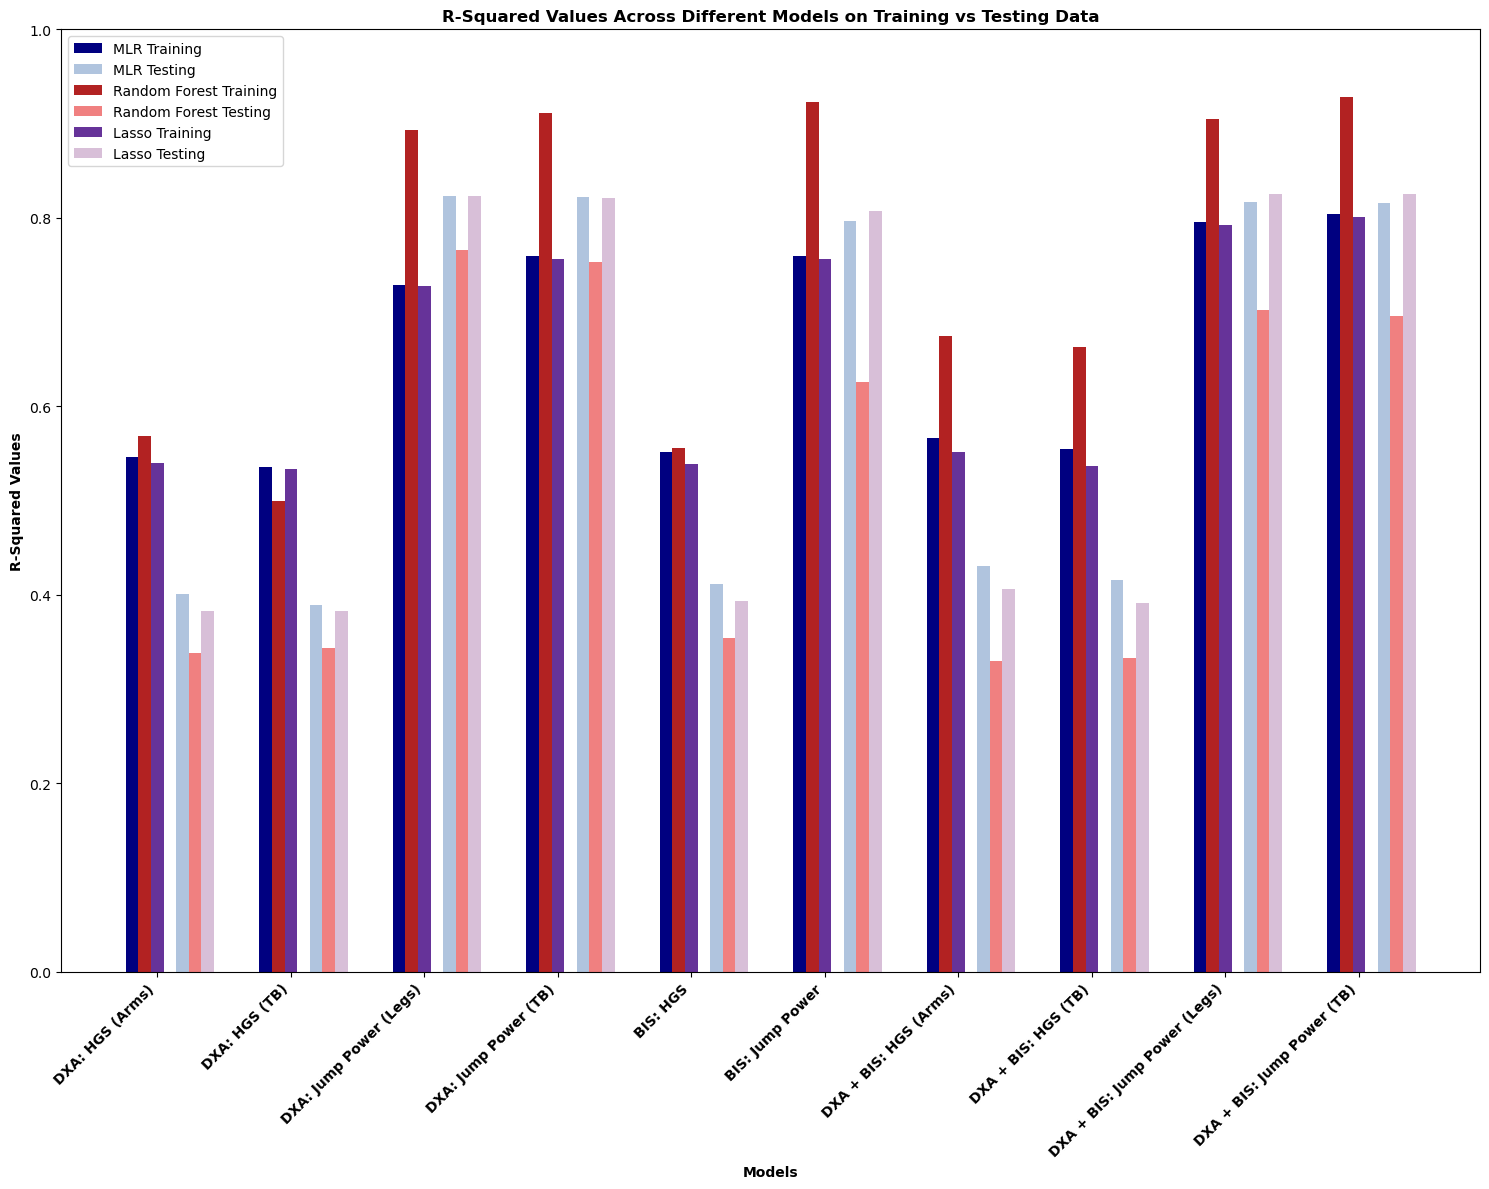

In [121]:
import numpy as np
import matplotlib.pyplot as plt

# Sample R-squared values for training and testing data for each model type, technique, and model
# Replace these values with your actual R-squared values obtained from training and testing your models

# R-squared values for Training data
mlr_train_r2 = [r2_train_1, r2_train_2, r2_train_3, r2_train_4, r2_train_5, r2_train_6, r2_train_7, r2_train_8, r2_train_9, r2_train_10]
rf_train_r2 = [r2_train_11, r2_train_12, r2_train_13, r2_train_14, r2_train_15, r2_train_16, r2_train_17, r2_train_18, r2_train_19, r2_train_20]
lasso_train_r2 = [r2_train_21, r2_train_22, r2_train_23, r2_train_24, r2_train_25, r2_train_26, r2_train_27, r2_train_28, r2_train_29, r2_train_30]

# R-squared values for Testing data
mlr_test_r2 = [r2_test_1, r2_test_2, r2_test_3, r2_test_4, r2_test_5, r2_test_6, r2_test_7, r2_test_8, r2_test_9, r2_test_10]
rf_test_r2 = [r2_test_11, r2_test_12, r2_test_13, r2_test_14, r2_test_15, r2_test_16, r2_test_17, r2_test_18, r2_test_19, r2_test_20]
lasso_test_r2 = [r2_test_21, r2_test_22, r2_test_23, r2_test_24, r2_test_25, r2_test_26, r2_test_27, r2_test_28, r2_test_29, r2_test_30]

# Bar plot settings
model_types = ['DXA', 'BIS', 'DXA + BIS']
models = ['DXA: HGS (Arms)', 'DXA: HGS (TB)', 'DXA: Jump Power (Legs)', 'DXA: Jump Power (TB)', 'BIS: HGS', 'BIS: Jump Power', 'DXA + BIS: HGS (Arms)', 'DXA + BIS: HGS (TB)', 'DXA + BIS: Jump Power (Legs)', 'DXA + BIS: Jump Power (TB)']
bar_width = 1.5
index = np.arange(len(models))  # Grouping 6 bars together
group_spacing = 0.1  # Space between each group of 6 bars

# Plotting the R-squared values for training and testing data
plt.figure(figsize=(15, 12))  # Adjust the figure size to accommodate all bars

# Calculate the positions for each group
num_models = len(models)
num_bars = len(mlr_train_r2)
total_width = num_models * bar_width + (num_models - 1) * group_spacing
index = np.arange(num_bars) * total_width

# Calculate the positions for each model's bars
mlr_positions = index - 3 * bar_width
rf_positions = index - 2 * bar_width
lasso_positions = index - bar_width
mlr_test_positions = index + bar_width
rf_test_positions = index + 2 * bar_width
lasso_test_positions = index + 3 * bar_width

# Plot the bars for each model
plt.bar(mlr_positions, mlr_train_r2, width=bar_width, label='MLR Training', color='navy')
plt.bar(mlr_test_positions, mlr_test_r2, width=bar_width, label='MLR Testing', color='lightsteelblue')
plt.bar(rf_positions, rf_train_r2, width=bar_width, label='Random Forest Training', color='firebrick')
plt.bar(rf_test_positions, rf_test_r2, width=bar_width, label='Random Forest Testing', color='lightcoral')
plt.bar(lasso_positions, lasso_train_r2, width=bar_width, label='Lasso Training', color='rebeccapurple')
plt.bar(lasso_test_positions, lasso_test_r2, width=bar_width, label='Lasso Testing', color='thistle')

# Group labels, ticks, and legend
group_positions = (mlr_positions + mlr_test_positions) / 2
plt.xlabel('Models', fontweight = 'bold')
plt.ylabel('R-Squared Values', fontweight = 'bold')
plt.title('R-Squared Values Across Different Models on Training vs Testing Data', fontweight = 'bold')
plt.xticks(group_positions, models, rotation=45, ha='right', fontweight = 'bold')
plt.legend(loc='upper left')
plt.ylim(0, 1)  # Set the y-axis limits between 0 and 1 (R-squared ranges from 0 to 1)

# Adjust the space between each group of bars
plt.subplots_adjust(wspace=group_spacing)

# Show the plot
plt.tight_layout()
plt.show()

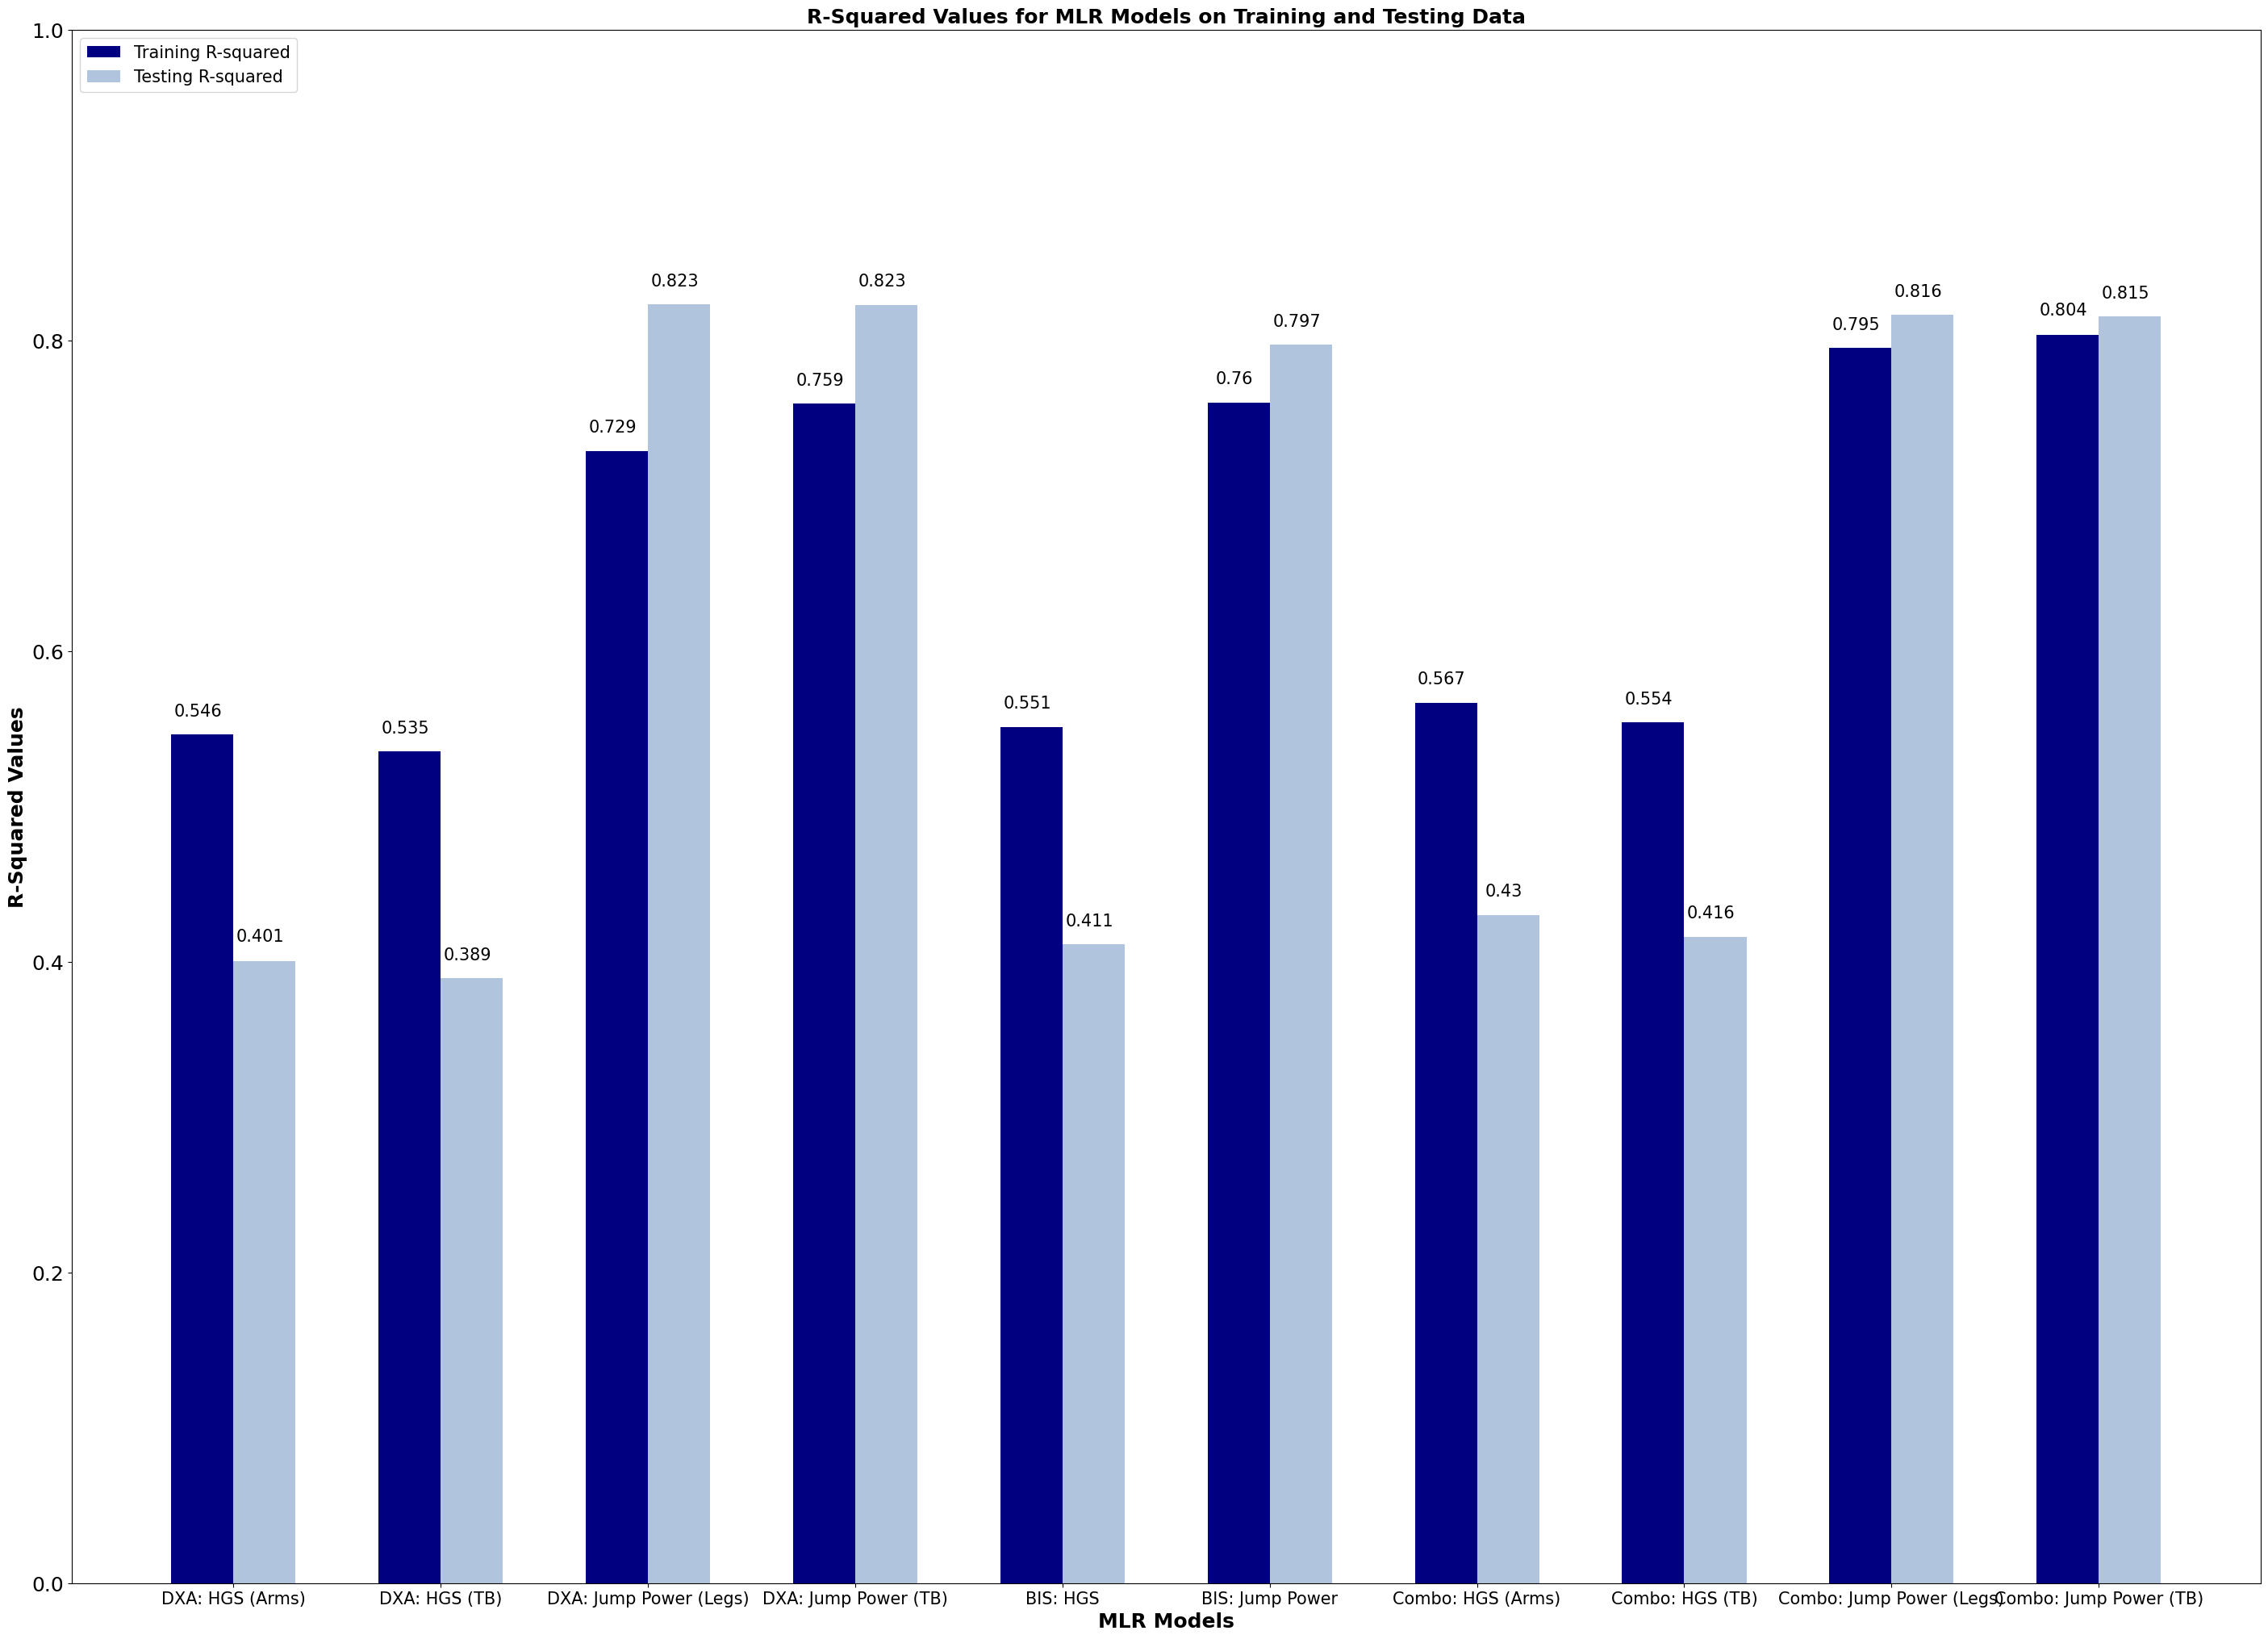

In [167]:
#MLR

import numpy as np
import matplotlib.pyplot as plt

# Sample R-squared values for training and testing data for MLR models
mlr_train_r2 = [r2_train_1, r2_train_2, r2_train_3, r2_train_4, r2_train_5, r2_train_6, r2_train_7, r2_train_8, r2_train_9, r2_train_10]
mlr_test_r2 = [r2_test_1, r2_test_2, r2_test_3, r2_test_4, r2_test_5, r2_test_6, r2_test_7, r2_test_8, r2_test_9, r2_test_10]

# Model names or labels for each MLR model (optional)
model_names = ['DXA: HGS (Arms)', 'DXA: HGS (TB)', 'DXA: Jump Power (Legs)', 'DXA: Jump Power (TB)', 'BIS: HGS', 'BIS: Jump Power', 'Combo: HGS (Arms)', 'Combo: HGS (TB)', 'Combo: Jump Power (Legs)', 'Combo: Jump Power (TB)']

# Bar plot settings
bar_width = 0.30
index = np.arange(len(model_names))

# Plotting the R-squared values for training and testing data for MLR models
plt.figure(figsize=(35, 25))  # Adjust the figure size if needed

# Create bar plots for training and testing data
plt.bar(index, mlr_train_r2, width=bar_width, label='Training R-squared', color='navy')
plt.bar(index + bar_width, mlr_test_r2, width=bar_width, label='Testing R-squared', color='lightsteelblue')

# Add data labels (optional)
for i, name in enumerate(model_names):
    plt.text(index[i] - 0.02, round(mlr_train_r2[i], 3) + 0.01, round(mlr_train_r2[i], 3), fontsize=15, ha='center', va='bottom')
    plt.text(index[i] + bar_width - 0.02, round(mlr_test_r2[i], 3) + 0.01, round(mlr_test_r2[i], 3), fontsize=15, ha='center', va='bottom')

# X-axis and Y-axis labels, and title
plt.xlabel('MLR Models', fontweight = 'bold', fontsize = 18)
plt.ylabel('R-Squared Values', fontweight = 'bold', fontsize = 18)
plt.title('R-Squared Values for MLR Models on Training and Testing Data', fontweight = 'bold', fontsize = 18)
plt.ylim(0, 1)

# X-axis tick labels
plt.xticks(index + bar_width / 2, model_names)

# X-axis tick labels with increased font size
plt.xticks(index + bar_width / 2, model_names, fontsize=15)

# Y-axis tick labels with increased font size
plt.yticks(fontsize=18)

# Show the legend
plt.legend(loc='upper left', fontsize = 15)

# Show the plot
#plt.tight_layout()
plt.show()


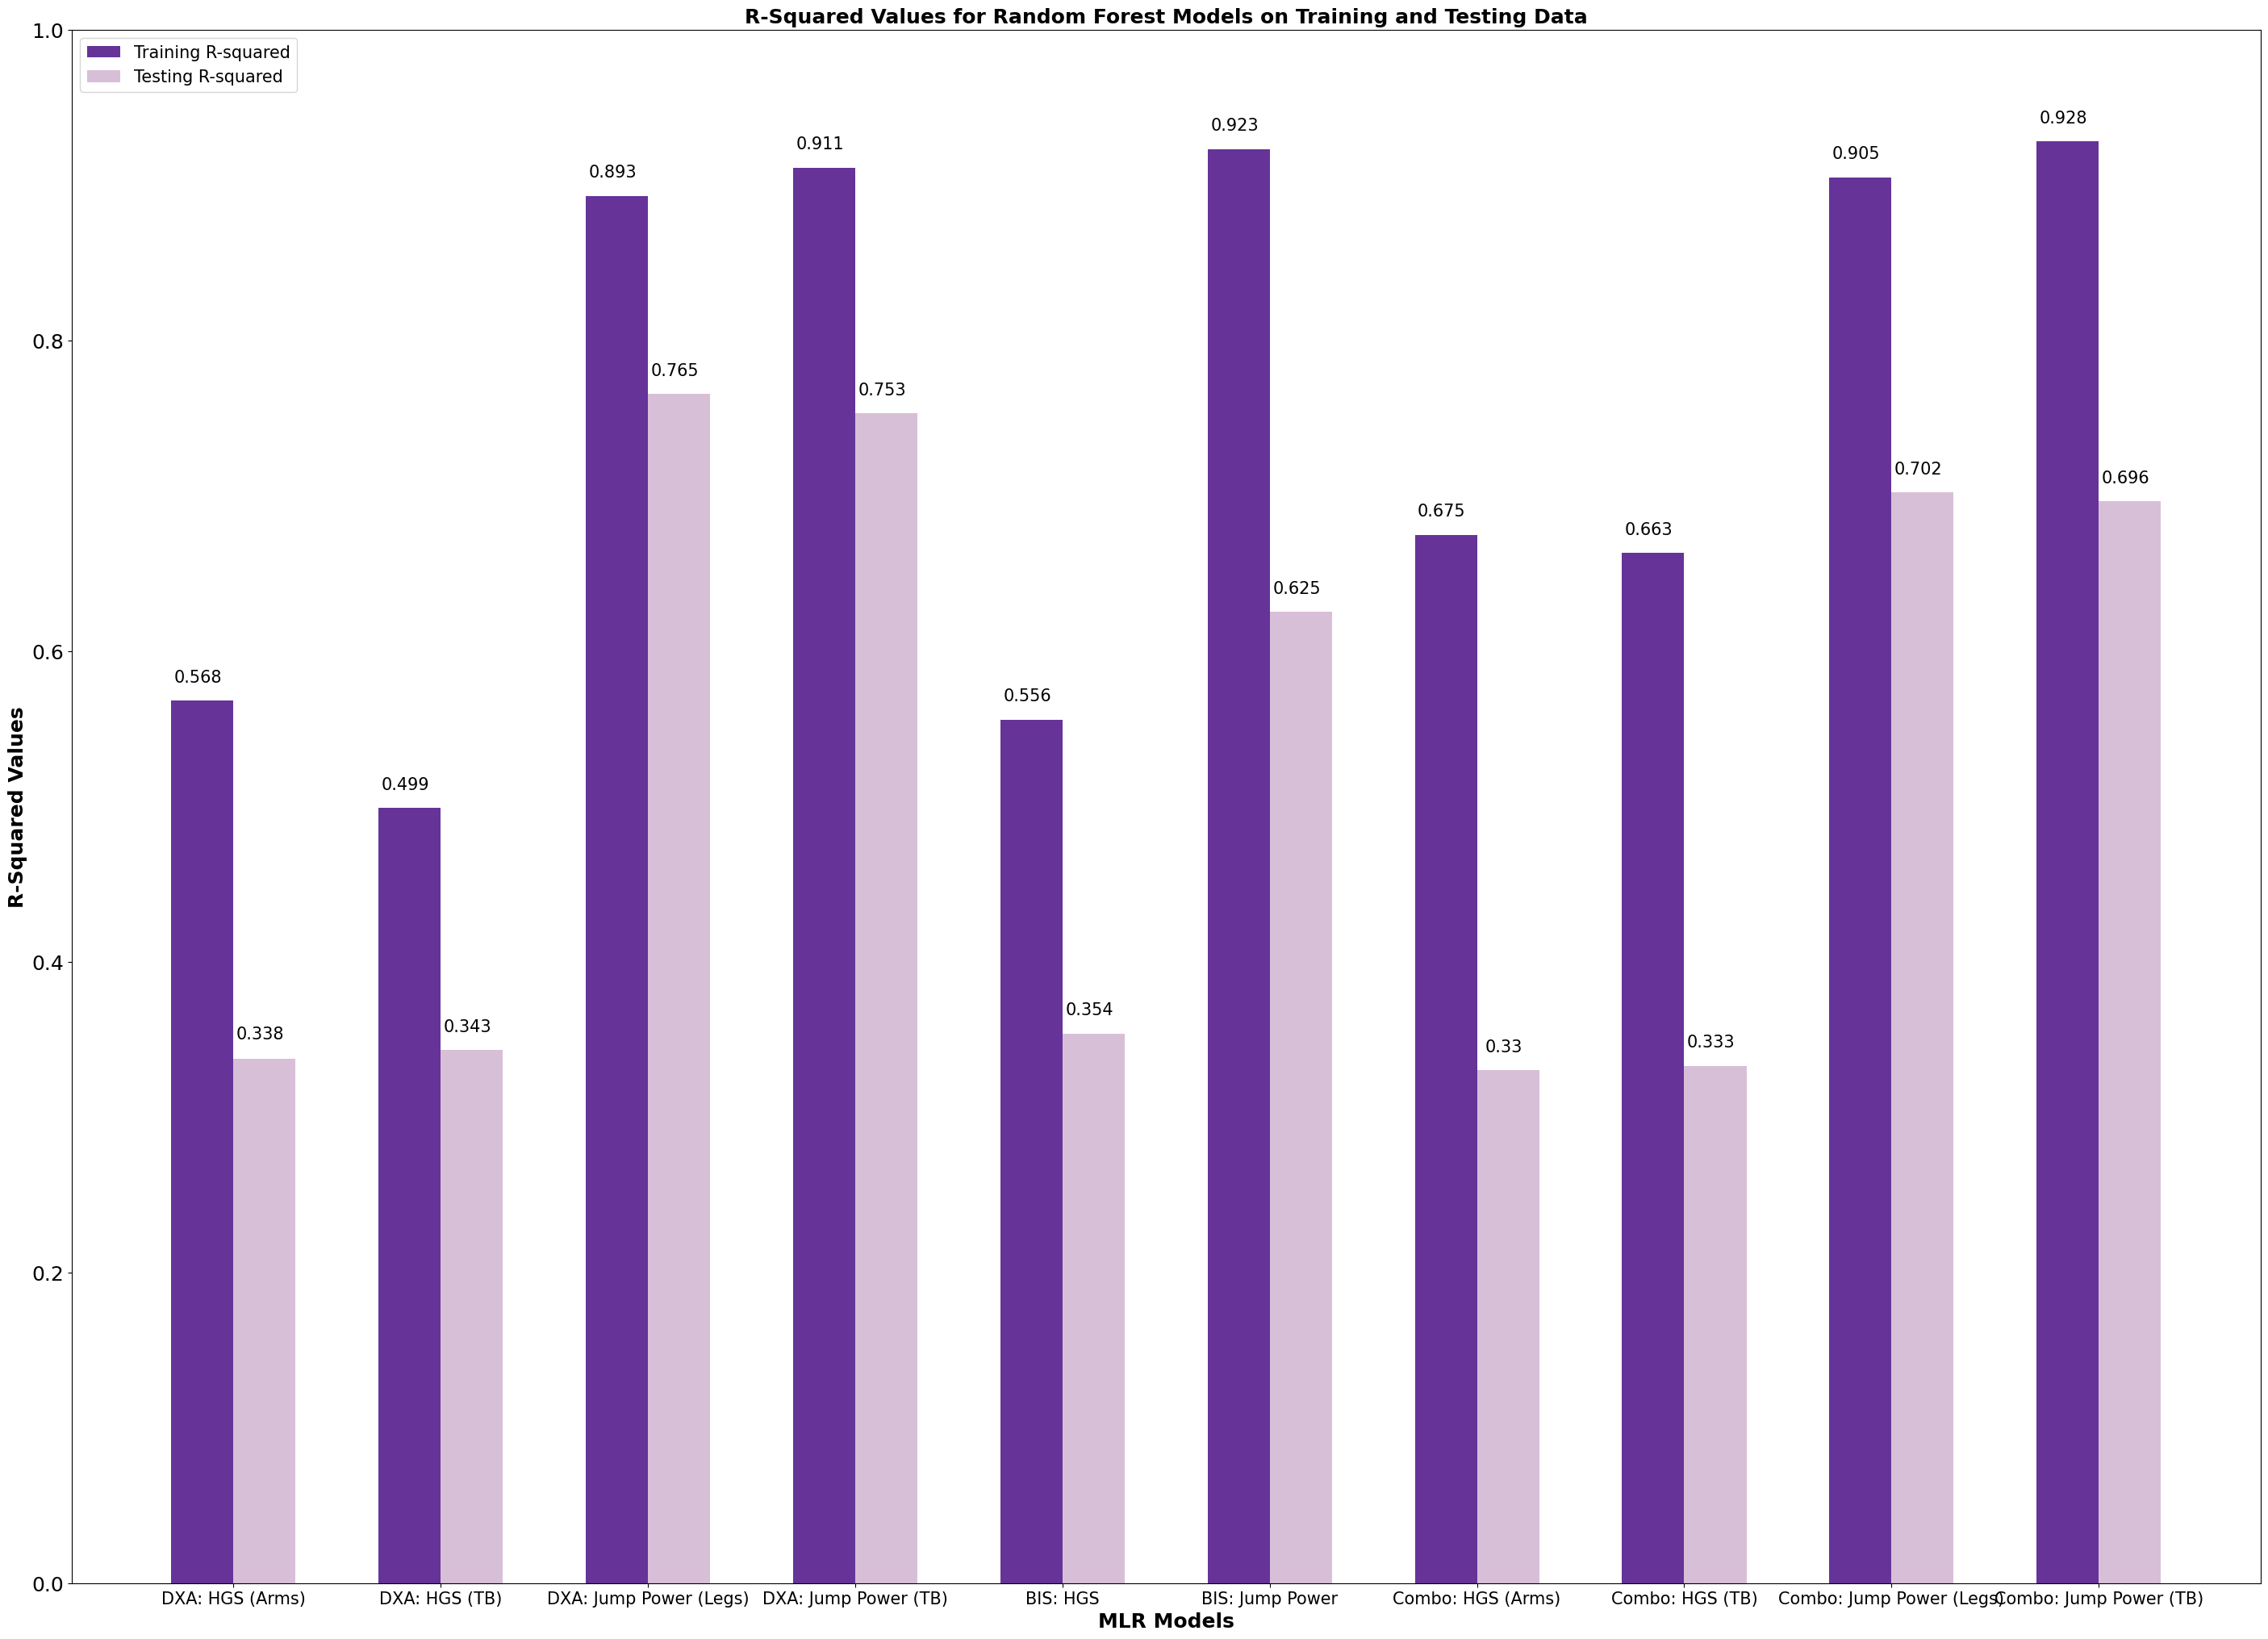

In [168]:
#Random Forest

import numpy as np
import matplotlib.pyplot as plt

# Sample R-squared values for training and testing data for MLR models
rf_train_r2 = [r2_train_11, r2_train_12, r2_train_13, r2_train_14, r2_train_15, r2_train_16, r2_train_17, r2_train_18, r2_train_19, r2_train_20]
rf_test_r2 = [r2_test_11, r2_test_12, r2_test_13, r2_test_14, r2_test_15, r2_test_16, r2_test_17, r2_test_18, r2_test_19, r2_test_20]

# Model names or labels for each MLR model (optional)
model_names = ['DXA: HGS (Arms)', 'DXA: HGS (TB)', 'DXA: Jump Power (Legs)', 'DXA: Jump Power (TB)', 'BIS: HGS', 'BIS: Jump Power', 'Combo: HGS (Arms)', 'Combo: HGS (TB)', 'Combo: Jump Power (Legs)', 'Combo: Jump Power (TB)']

# Bar plot settings
bar_width = 0.30
index = np.arange(len(model_names))

# Plotting the R-squared values for training and testing data for MLR models
plt.figure(figsize=(35, 25))  # Adjust the figure size if needed

# Create bar plots for training and testing data
plt.bar(index, rf_train_r2, width=bar_width, label='Training R-squared', color='rebeccapurple')
plt.bar(index + bar_width, rf_test_r2, width=bar_width, label='Testing R-squared', color='thistle')

# Add data labels (optional)
for i, name in enumerate(model_names):
    plt.text(index[i] - 0.02, round(rf_train_r2[i], 3) + 0.01, round(rf_train_r2[i], 3), fontsize=15, ha='center', va='bottom')
    plt.text(index[i] + bar_width - 0.02, round(rf_test_r2[i], 3) + 0.01, round(rf_test_r2[i], 3), fontsize=15, ha='center', va='bottom')

# X-axis and Y-axis labels, and title
plt.xlabel('MLR Models', fontweight = 'bold', fontsize = 18)
plt.ylabel('R-Squared Values', fontweight = 'bold', fontsize = 18)
plt.title('R-Squared Values for Random Forest Models on Training and Testing Data', fontweight = 'bold', fontsize = 18)
plt.ylim(0, 1)

# X-axis tick labels
plt.xticks(index + bar_width / 2, model_names)

# X-axis tick labels with increased font size
plt.xticks(index + bar_width / 2, model_names, fontsize=15)

# Y-axis tick labels with increased font size
plt.yticks(fontsize=18)

# Show the legend
plt.legend(loc='upper left', fontsize = 15)

# Show the plot
#plt.tight_layout()
plt.show()


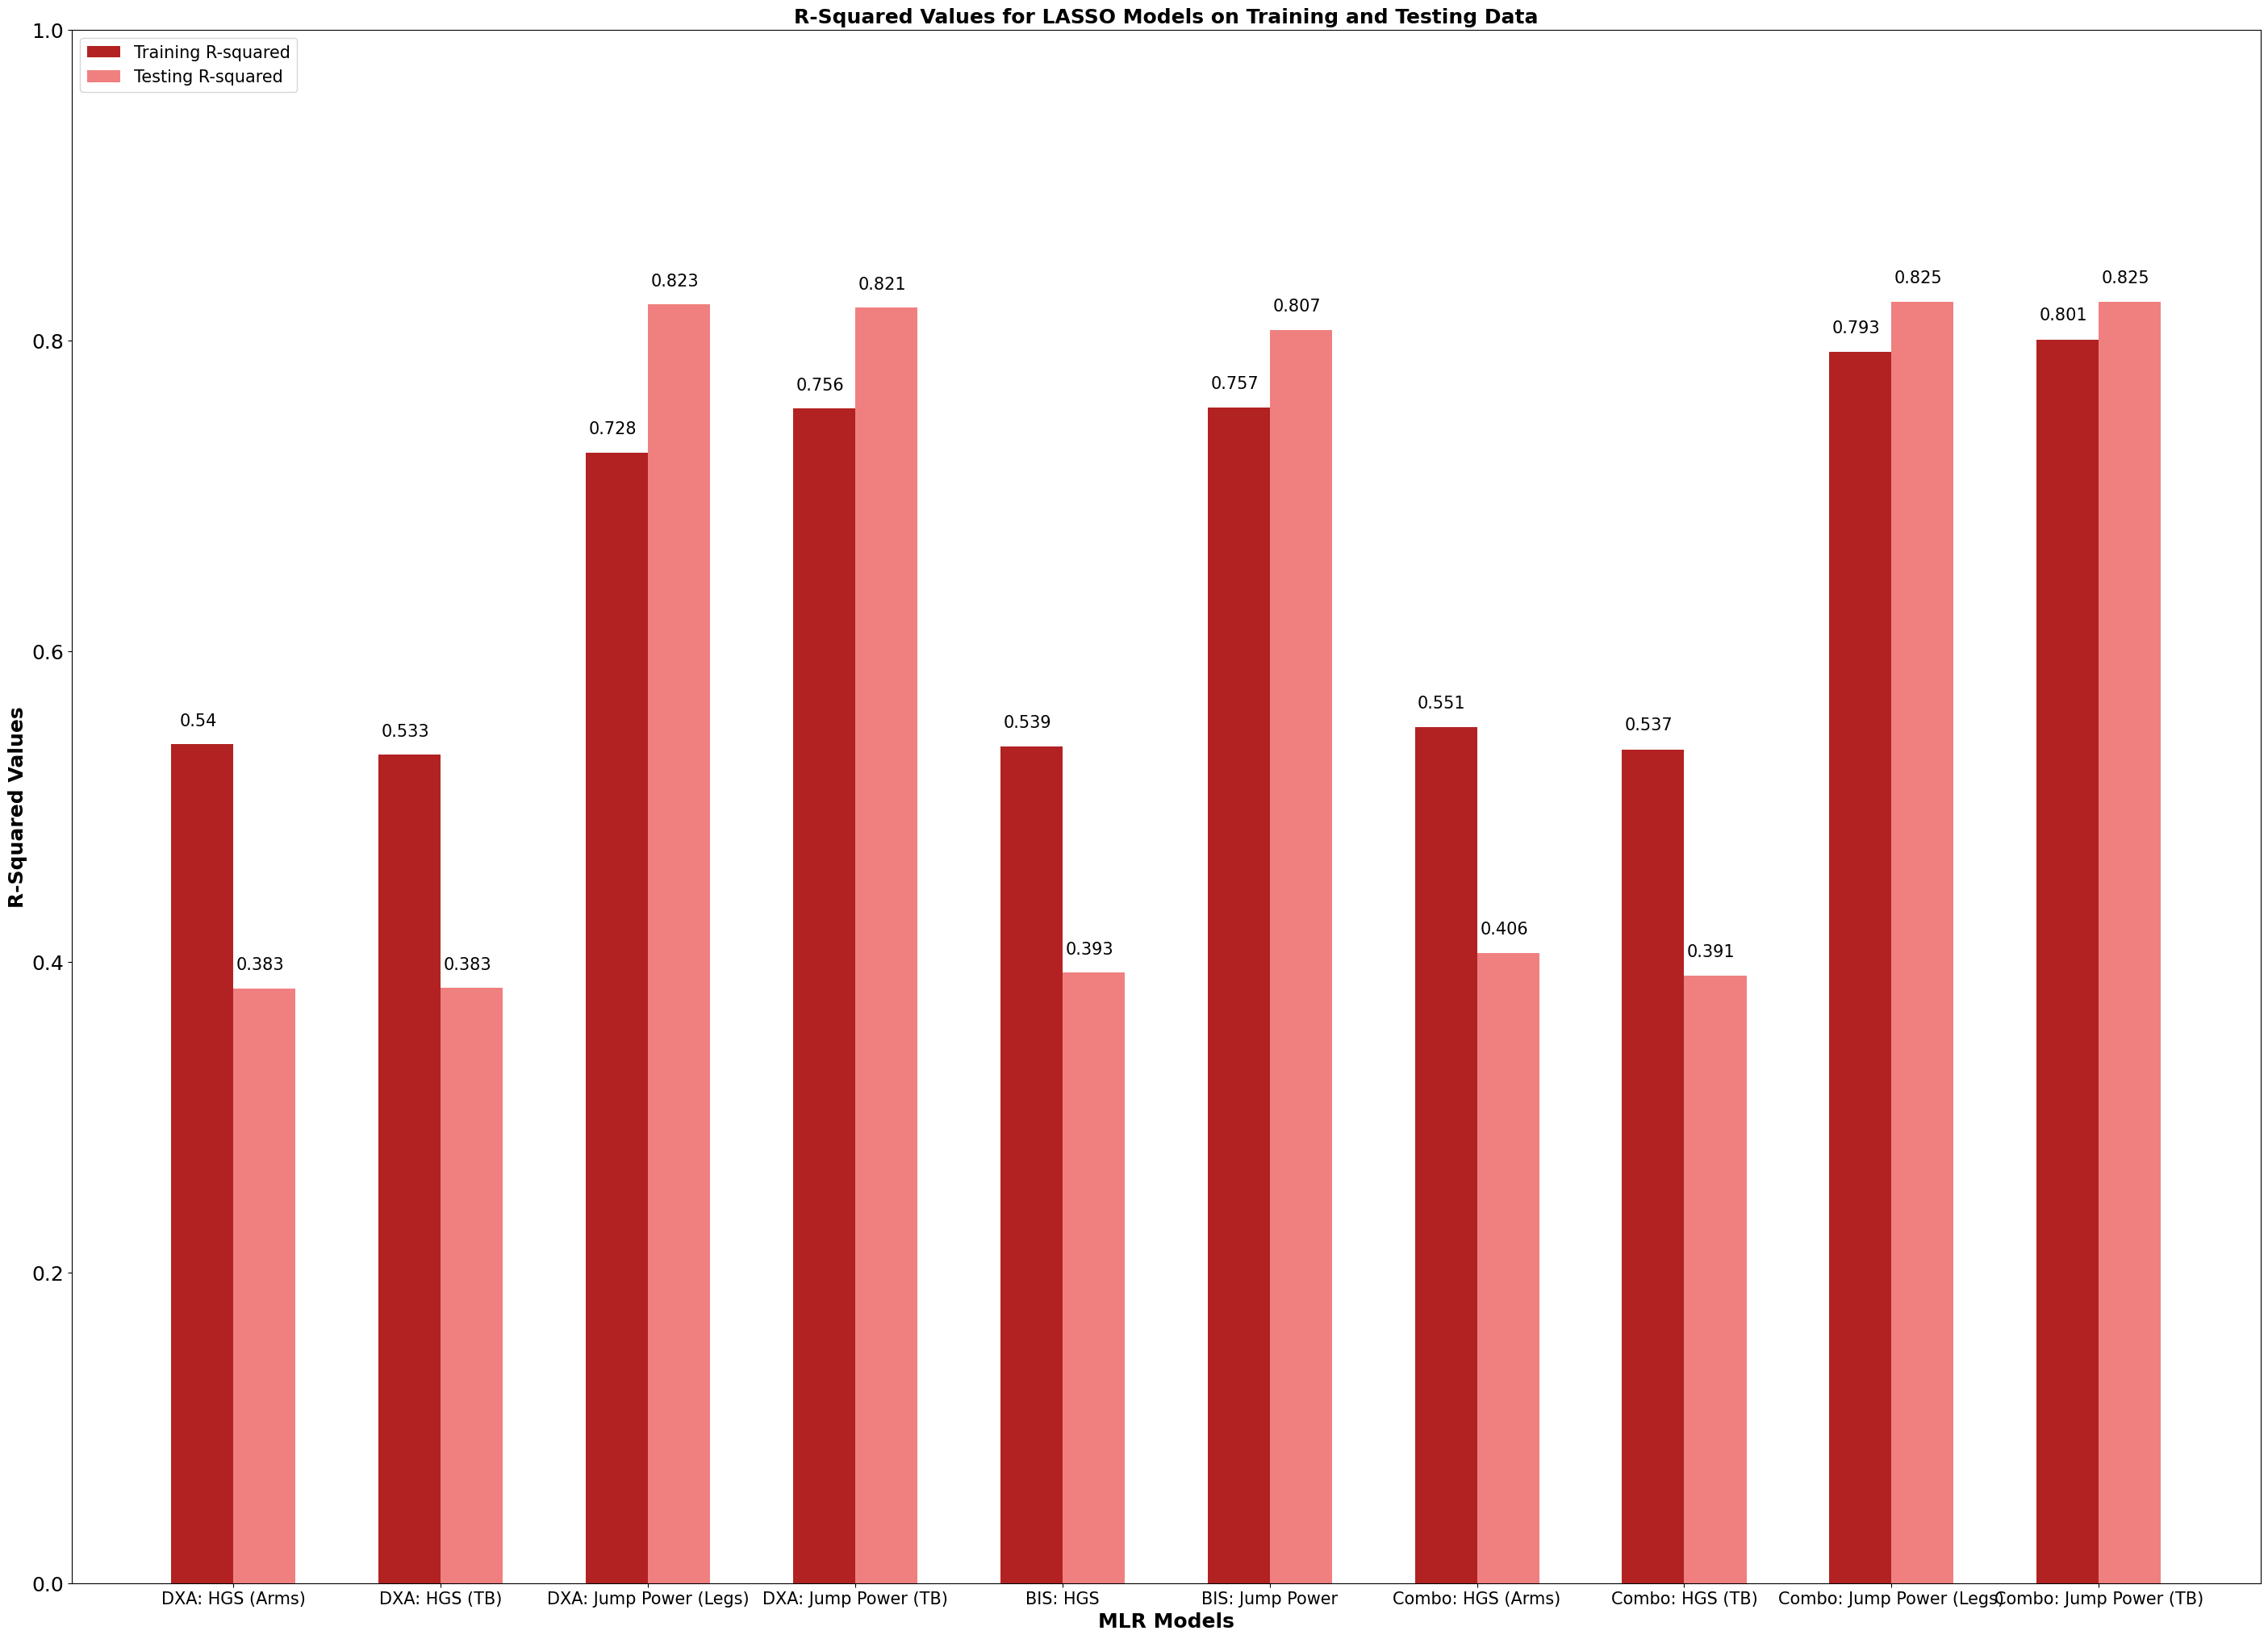

In [169]:
#LASSO

import numpy as np
import matplotlib.pyplot as plt

# Sample R-squared values for training and testing data for MLR models
lasso_train_r2 = [r2_train_21, r2_train_22, r2_train_23, r2_train_24, r2_train_25, r2_train_26, r2_train_27, r2_train_28, r2_train_29, r2_train_30]
lasso_test_r2 = [r2_test_21, r2_test_22, r2_test_23, r2_test_24, r2_test_25, r2_test_26, r2_test_27, r2_test_28, r2_test_29, r2_test_30]

# Model names or labels for each MLR model (optional)
model_names = ['DXA: HGS (Arms)', 'DXA: HGS (TB)', 'DXA: Jump Power (Legs)', 'DXA: Jump Power (TB)', 'BIS: HGS', 'BIS: Jump Power', 'Combo: HGS (Arms)', 'Combo: HGS (TB)', 'Combo: Jump Power (Legs)', 'Combo: Jump Power (TB)']

# Bar plot settings
bar_width = 0.30
index = np.arange(len(model_names))

# Plotting the R-squared values for training and testing data for MLR models
plt.figure(figsize=(35, 25))  # Adjust the figure size if needed

# Create bar plots for training and testing data
plt.bar(index, lasso_train_r2, width=bar_width, label='Training R-squared', color='firebrick')
plt.bar(index + bar_width, lasso_test_r2, width=bar_width, label='Testing R-squared', color='lightcoral')

# Add data labels (optional)
for i, name in enumerate(model_names):
    plt.text(index[i] - 0.02, round(lasso_train_r2[i], 3) + 0.01, round(lasso_train_r2[i], 3), fontsize=15, ha='center', va='bottom')
    plt.text(index[i] + bar_width - 0.02, round(lasso_test_r2[i], 3) + 0.01, round(lasso_test_r2[i], 3), fontsize=15, ha='center', va='bottom')

# X-axis and Y-axis labels, and title
plt.xlabel('MLR Models', fontweight = 'bold', fontsize = 18)
plt.ylabel('R-Squared Values', fontweight = 'bold', fontsize = 18)
plt.title('R-Squared Values for LASSO Models on Training and Testing Data', fontweight = 'bold', fontsize = 18)
plt.ylim(0, 1)

# X-axis tick labels with increased font size
plt.xticks(index + bar_width / 2, model_names, fontsize=15)

# Y-axis tick labels with increased font size
plt.yticks(fontsize=18)

# Show the legend
plt.legend(loc='upper left', fontsize = 15)

# Show the plot
#plt.tight_layout()
plt.show()

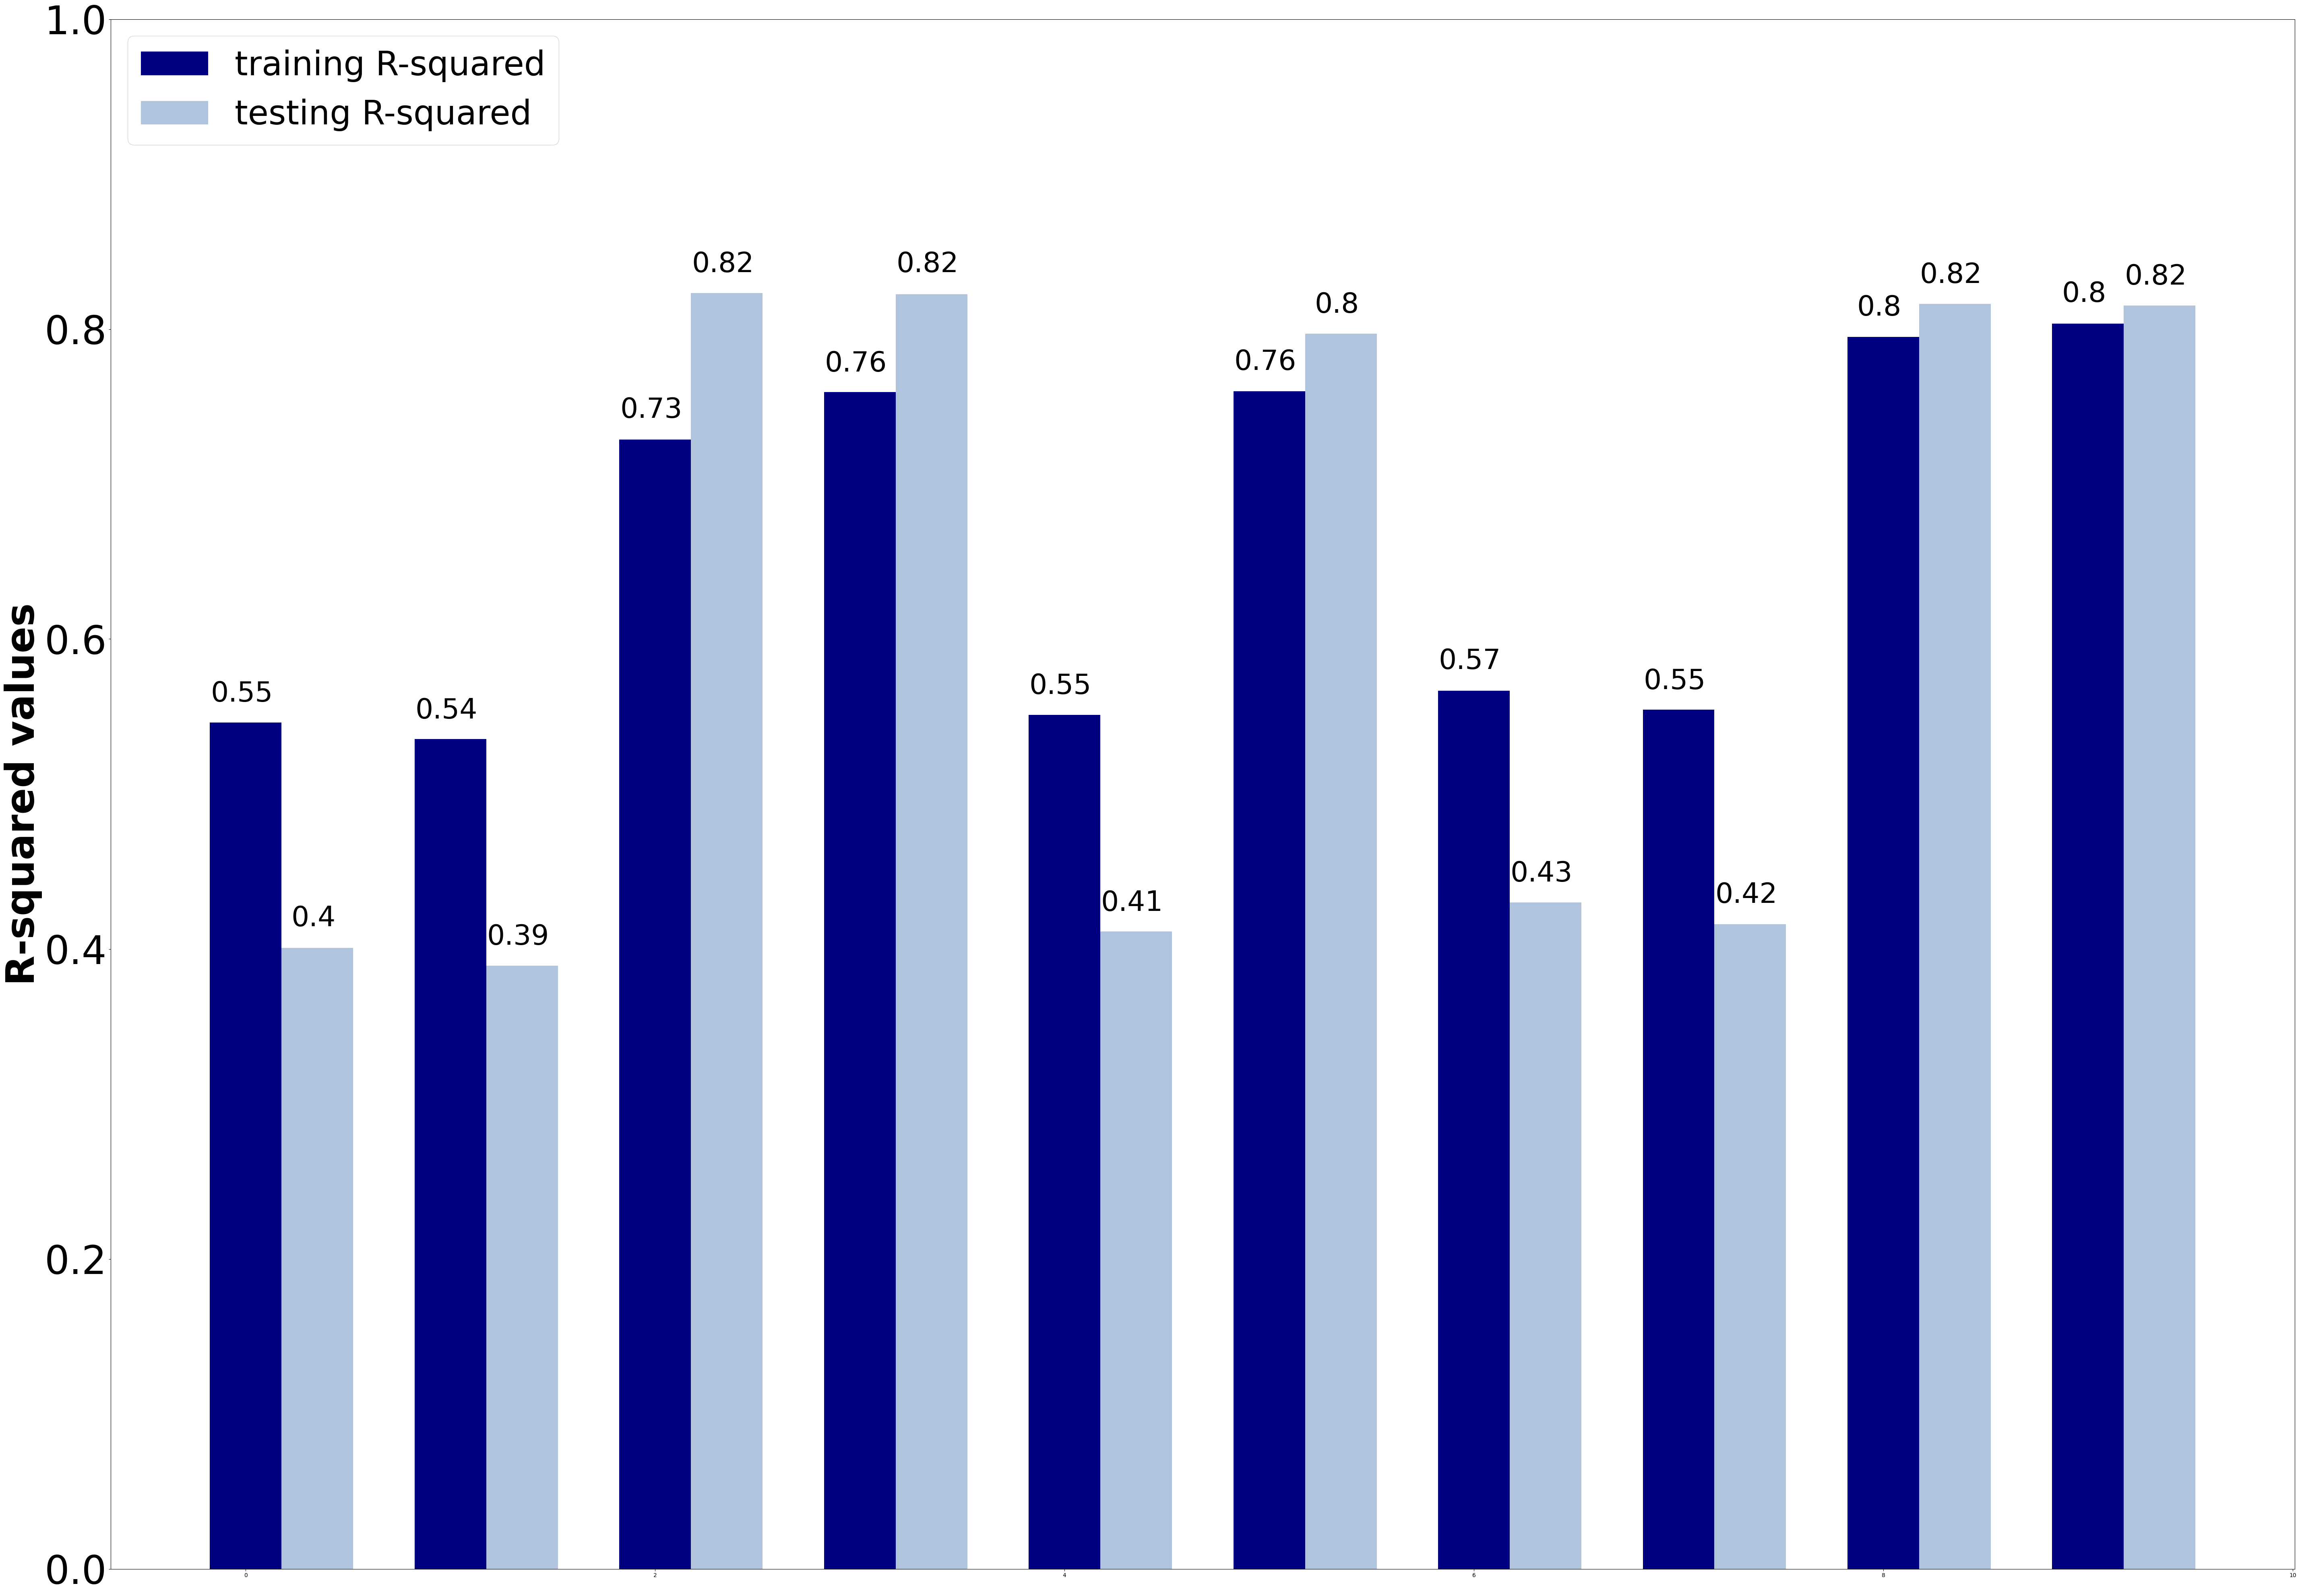

In [264]:
#MLR

import numpy as np
import matplotlib.pyplot as plt

# Sample R-squared values for training and testing data for MLR models
mlr_train_r2 = [r2_train_1, r2_train_2, r2_train_3, r2_train_4, r2_train_5, r2_train_6, r2_train_7, r2_train_8, r2_train_9, r2_train_10]
mlr_test_r2 = [r2_test_1, r2_test_2, r2_test_3, r2_test_4, r2_test_5, r2_test_6, r2_test_7, r2_test_8, r2_test_9, r2_test_10]

# Model names or labels for each MLR model (optional)
model_names = ['DXA: HGS (Arms)', 'DXA: HGS (TB)', 'DXA: Jump Power (Legs)', 'DXA: Jump Power (TB)', 'BIS: HGS', 'BIS: Jump Power', 'Combo: HGS (Arms)', 'Combo: HGS (TB)', 'Combo: Jump Power (Legs)', 'Combo: Jump Power (TB)']

# Bar plot settings
bar_width = 0.35
index = np.arange(len(model_names))

# Plotting the R-squared values for training and testing data for MLR models
plt.figure(figsize=(70, 50))  # Adjust the figure size if needed

# Create bar plots for training and testing data
plt.bar(index, mlr_train_r2, width=bar_width, label='training R-squared', color='navy')
plt.bar(index + bar_width, mlr_test_r2, width=bar_width, label='testing R-squared', color='lightsteelblue')

# Add data labels (optional)
for i, name in enumerate(model_names):
    plt.text(index[i] - 0.02, round(mlr_train_r2[i], 3) + 0.01, round(mlr_train_r2[i], 2), fontsize=50, ha='center', va='bottom')
    plt.text(index[i] + bar_width - 0.02, round(mlr_test_r2[i], 3) + 0.01, round(mlr_test_r2[i], 2), fontsize=50, ha='center', va='bottom')

# X-axis and Y-axis labels, and title
#plt.xlabel('MLR Models', fontweight = 'bold', fontsize = 70)
plt.ylabel('R-squared values', fontweight = 'bold', fontsize = 70)
#plt.title('R-squared values for MLR, LASSO, and RF models on training and testing data', fontweight = 'bold', fontsize = 80)
plt.ylim(0, 1)

# X-axis tick labels with increased font size
#plt.xticks(index + (bar_width/ -2.5), model_names, rotation = 50, fontsize=70)

# Y-axis tick labels with increased font size
plt.yticks(fontsize=70)

# Show the legend
plt.legend(loc='upper left', fontsize = 60)

# Show the plot
#plt.tight_layout()
plt.show()


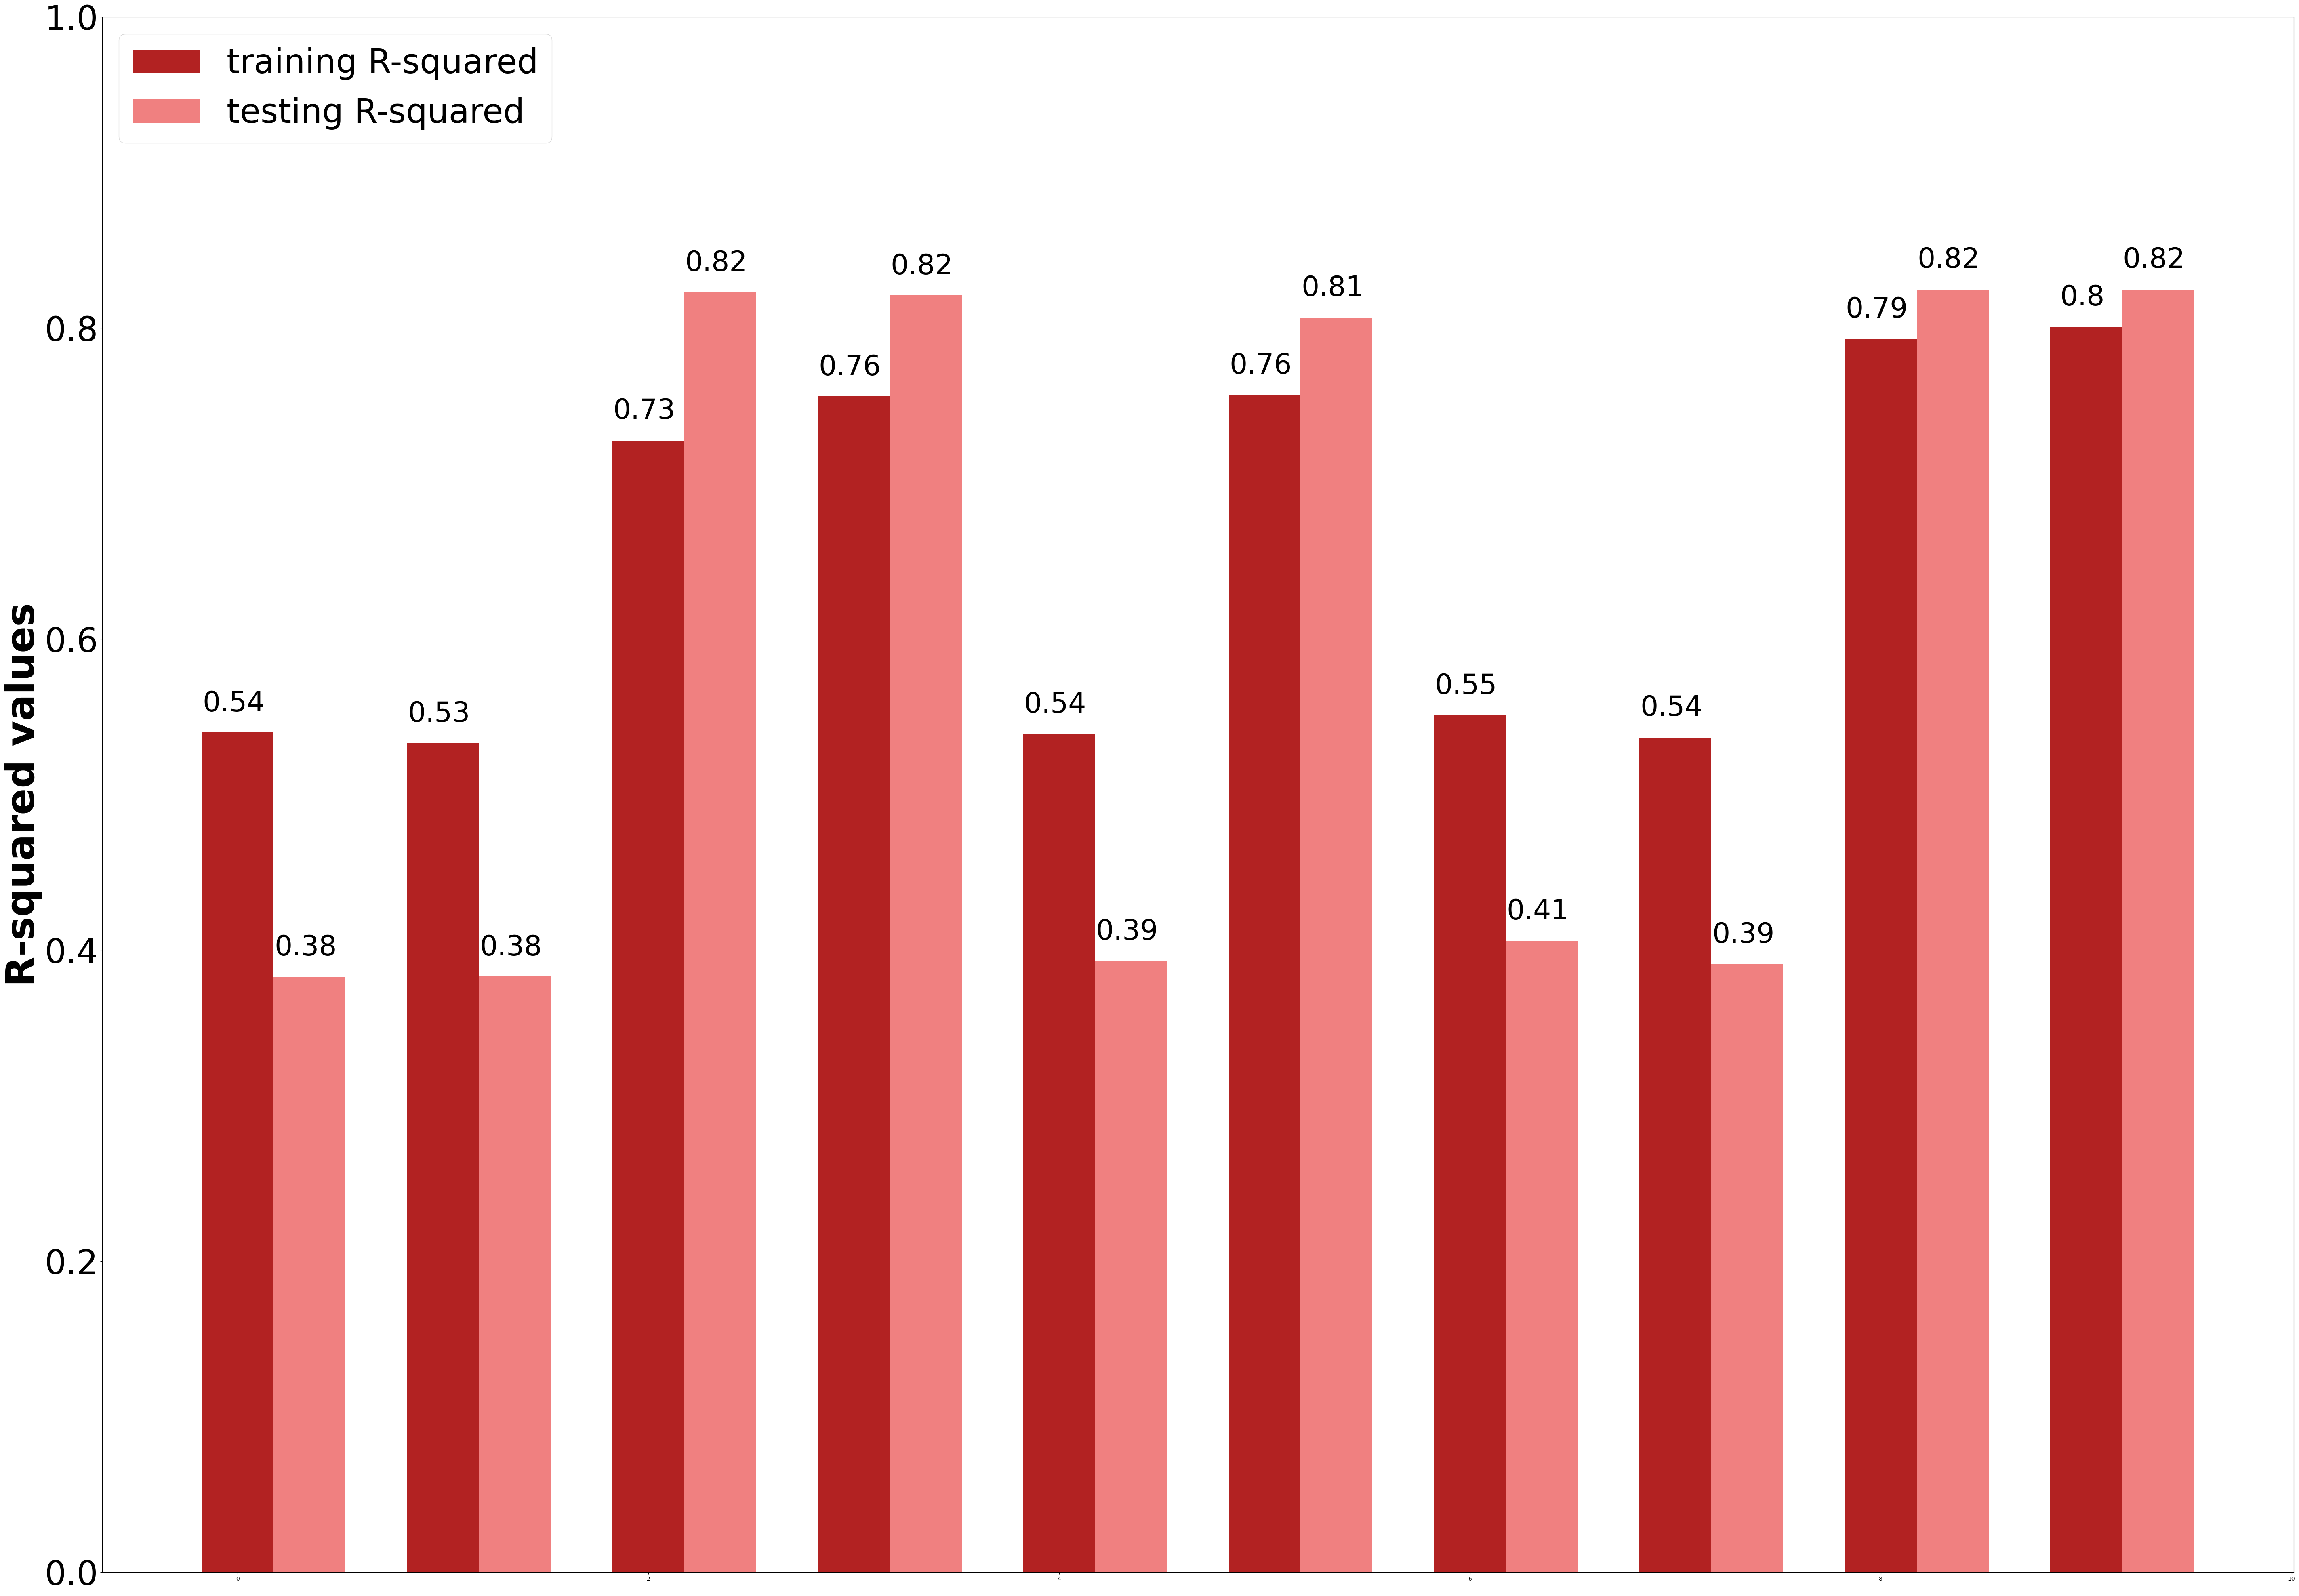

In [281]:
#LASSO

import numpy as np
import matplotlib.pyplot as plt

# Sample R-squared values for training and testing data for MLR models
lasso_train_r2 = [r2_train_21, r2_train_22, r2_train_23, r2_train_24, r2_train_25, r2_train_26, r2_train_27, r2_train_28, r2_train_29, r2_train_30]
lasso_test_r2 = [r2_test_21, r2_test_22, r2_test_23, r2_test_24, r2_test_25, r2_test_26, r2_test_27, r2_test_28, r2_test_29, r2_test_30]

# Model names or labels for each MLR model (optional)
model_names = ['DXA: HGS (Arms)', 'DXA: HGS (TB)', 'DXA: Jump Power (Legs)', 'DXA: Jump Power (TB)', 'BIS: HGS', 'BIS: Jump Power', 'Combo: HGS (Arms)', 'Combo: HGS (TB)', 'Combo: Jump Power (Legs)', 'Combo: Jump Power (TB)']

# Bar plot settings
bar_width = 0.35
index = np.arange(len(model_names))

# Plotting the R-squared values for training and testing data for MLR models
plt.figure(figsize=(70, 50))  # Adjust the figure size if needed

# Create bar plots for training and testing data
plt.bar(index, lasso_train_r2, width=bar_width, label='training R-squared', color='firebrick')
plt.bar(index + bar_width, lasso_test_r2, width=bar_width, label='testing R-squared', color='lightcoral')

# Add data labels (optional)
for i, name in enumerate(model_names):
    plt.text(index[i] - 0.02, round(lasso_train_r2[i], 3) + 0.01, round(lasso_train_r2[i], 2), fontsize=50, ha='center', va='bottom')
    plt.text(index[i] + bar_width - 0.02, round(lasso_test_r2[i], 3) + 0.01, round(lasso_test_r2[i], 2), fontsize=50, ha='center', va='bottom')

# X-axis and Y-axis labels, and title
#plt.xlabel('LASSO Models', fontweight = 'bold', fontsize = 70)
plt.ylabel('R-squared values', fontweight = 'bold', fontsize = 70)
#plt.title('R-Squared Values for LASSO Models on Training and Testing Data', fontweight = 'bold', fontsize = 80)
plt.ylim(0, 1)

# X-axis tick labels with increased font size
#plt.xticks(index + bar_width / -2.5, model_names, rotation = 50, fontsize=70)

# Y-axis tick labels with increased font size
plt.yticks(fontsize=60)

# Show the legend
plt.legend(loc='upper left', fontsize = 60)

# Show the plot
#plt.tight_layout()
plt.show()

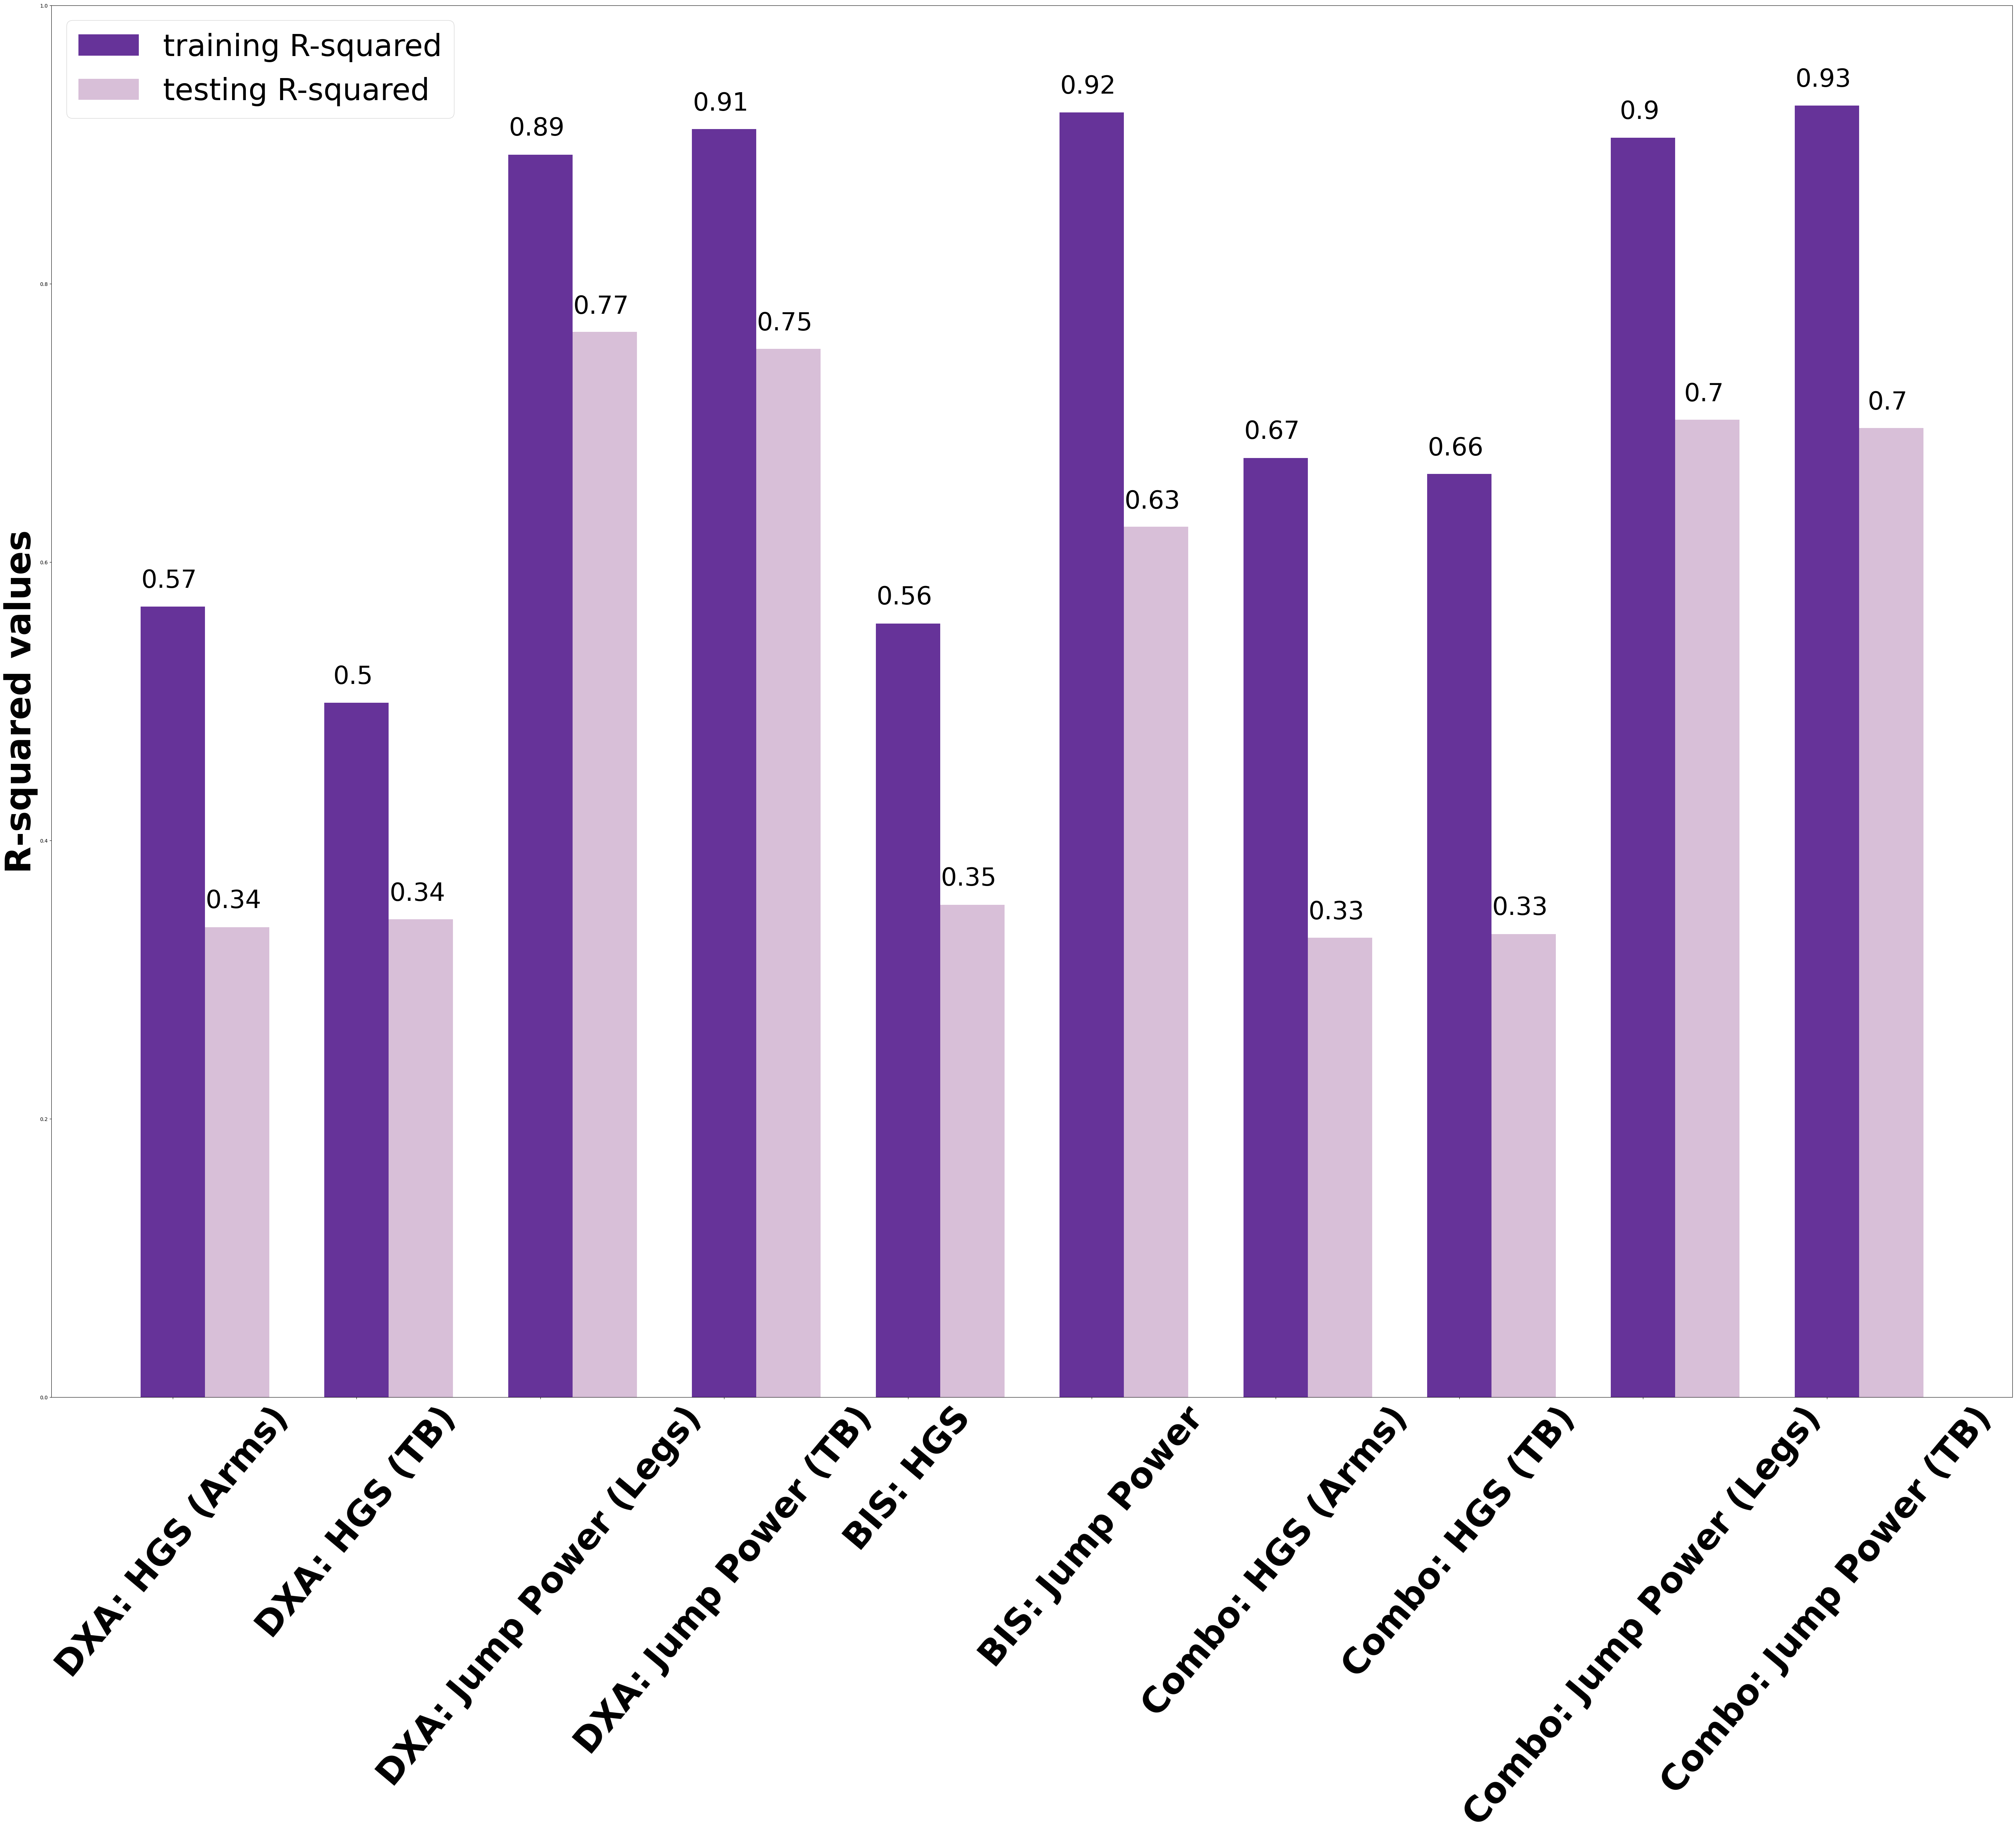

In [263]:
#Random Forest

import numpy as np
import matplotlib.pyplot as plt

# Sample R-squared values for training and testing data for MLR models
rf_train_r2 = [r2_train_11, r2_train_12, r2_train_13, r2_train_14, r2_train_15, r2_train_16, r2_train_17, r2_train_18, r2_train_19, r2_train_20]
rf_test_r2 = [r2_test_11, r2_test_12, r2_test_13, r2_test_14, r2_test_15, r2_test_16, r2_test_17, r2_test_18, r2_test_19, r2_test_20]

# Model names or labels for each MLR model (optional)
model_names = ['DXA: HGS (Arms)', 'DXA: HGS (TB)', 'DXA: Jump Power (Legs)', 'DXA: Jump Power (TB)', 'BIS: HGS', 'BIS: Jump Power', 'Combo: HGS (Arms)', 'Combo: HGS (TB)', 'Combo: Jump Power (Legs)', 'Combo: Jump Power (TB)']

# Bar plot settings
bar_width = 0.35
index = np.arange(len(model_names))

# Plotting the R-squared values for training and testing data for MLR models
plt.figure(figsize=(70, 50))  # Adjust the figure size if needed

# Create bar plots for training and testing data
plt.bar(index, rf_train_r2, width=bar_width, label='training R-squared', color='rebeccapurple')
plt.bar(index + bar_width, rf_test_r2, width=bar_width, label='testing R-squared', color='thistle')

# Add data labels (optional)
for i, name in enumerate(model_names):
    plt.text(index[i] - 0.02, round(rf_train_r2[i], 3) + 0.01, round(rf_train_r2[i], 2), fontsize=50, ha='center', va='bottom')
    plt.text(index[i] + bar_width - 0.02, round(rf_test_r2[i], 3) + 0.01, round(rf_test_r2[i], 2), fontsize=50, ha='center', va='bottom')

# X-axis and Y-axis labels, and title
#plt.xlabel('Random Forest Models', fontweight = 'bold', fontsize = 70)
plt.ylabel('R-squared values', fontweight = 'bold', fontsize = 70)
#plt.title('R-Squared Values for Random Forest Models on Training and Testing Data', fontweight = 'bold', fontsize = 80)
plt.ylim(0, 1)

# X-axis tick labels
plt.xticks(index + bar_width / -3, model_names, rotation = 50, fontsize = 70)
# Set xtick positions and labels
xtick_positions = index  # Use the original x positions
xtick_labels = model_names

plt.xticks(xtick_positions, xtick_labels, fontweight = 'bold')

# Y-axis tick labels with increased font size
#plt.yticks(fontsize=70)

# Show the legend
plt.legend(loc='upper left', fontsize = 60)

# Show the plot
#plt.tight_layout()
plt.show()


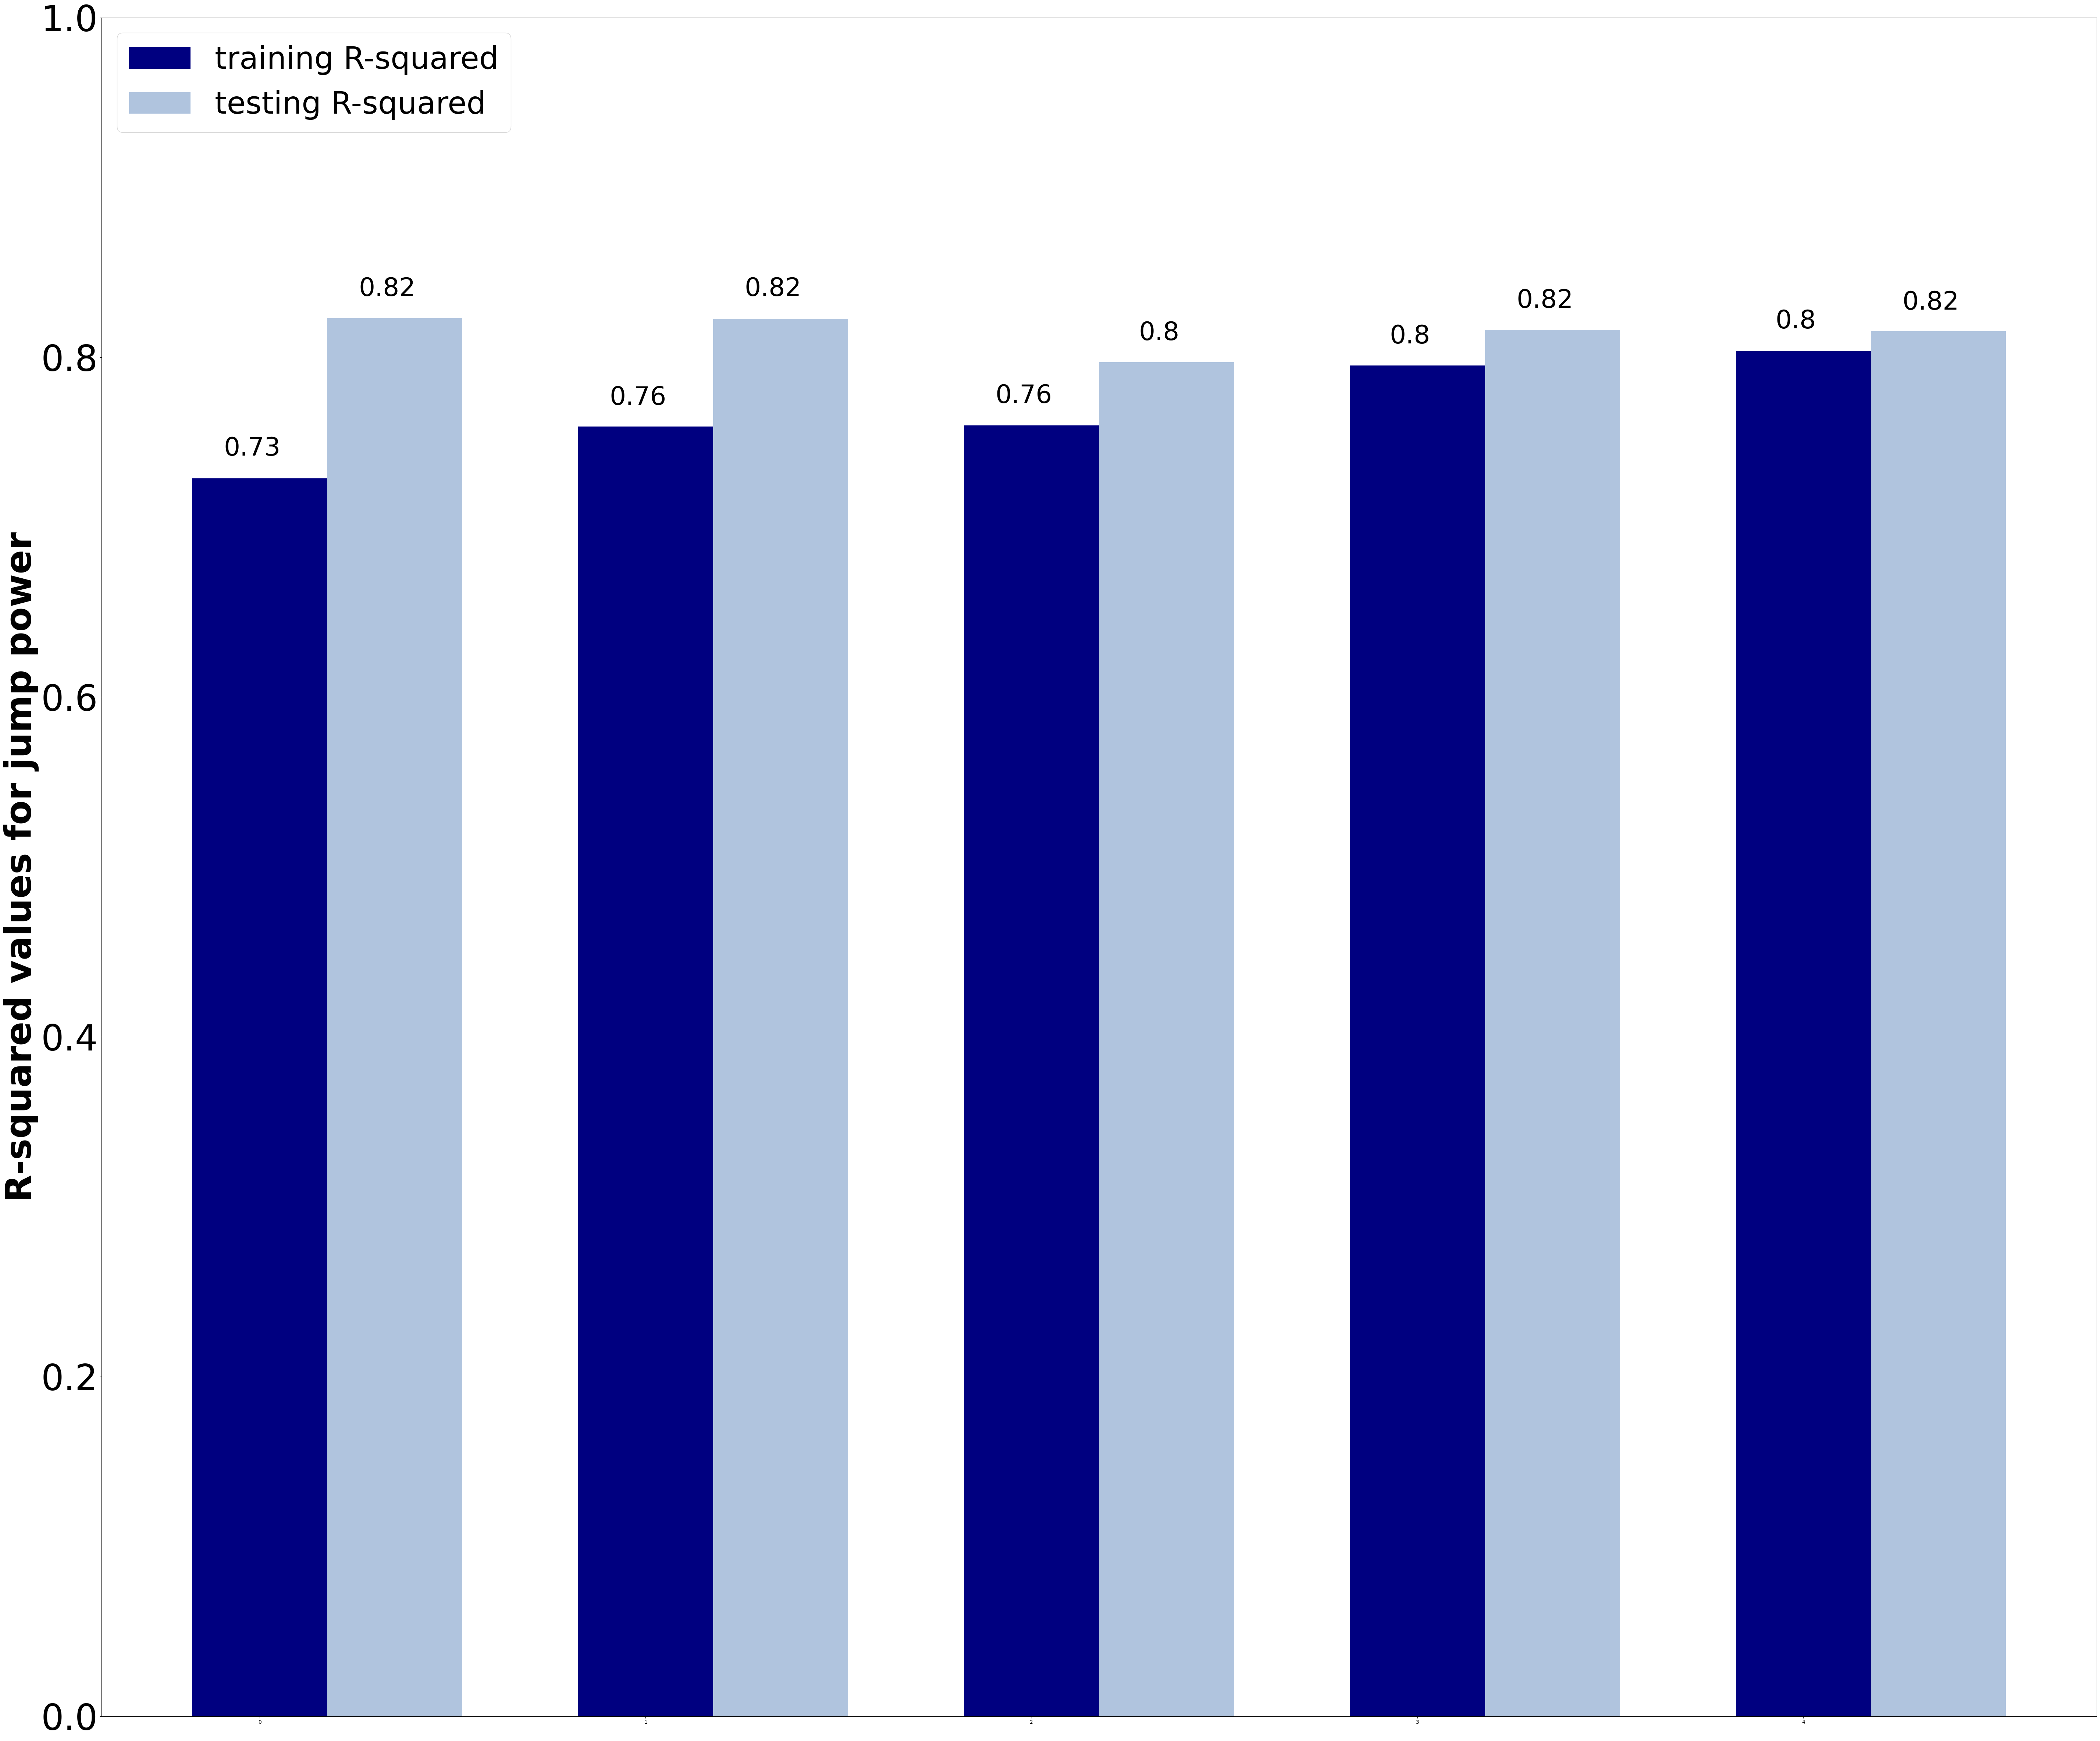

In [273]:
#MLR

import numpy as np
import matplotlib.pyplot as plt

# Sample R-squared values for training and testing data for MLR models
mlr_train_r2 = [r2_train_3, r2_train_4, r2_train_6, r2_train_9, r2_train_10]
mlr_test_r2 = [r2_test_3, r2_test_4, r2_test_6, r2_test_9, r2_test_10]

# Model names or labels for each MLR model (optional)
model_names = ['DXA: Jump Power (Legs)', 'DXA: Jump Power (TB)', 'BIS: Jump Power', 'Combo: Jump Power (Legs)', 'Combo: Jump Power (TB)']

# Bar plot settings
bar_width = 0.35
index = np.arange(len(model_names))

# Plotting the R-squared values for training and testing data for MLR models
plt.figure(figsize=(70, 60))  # Adjust the figure size if needed

# Create bar plots for training and testing data
plt.bar(index, mlr_train_r2, width=bar_width, label='training R-squared', color='navy')
plt.bar(index + bar_width, mlr_test_r2, width=bar_width, label='testing R-squared', color='lightsteelblue')

# Add data labels (optional)
for i, name in enumerate(model_names):
    plt.text(index[i] - 0.02, round(mlr_train_r2[i], 3) + 0.01, round(mlr_train_r2[i], 2), fontsize=50, ha='center', va='bottom')
    plt.text(index[i] + bar_width - 0.02, round(mlr_test_r2[i], 3) + 0.01, round(mlr_test_r2[i], 2), fontsize=50, ha='center', va='bottom')

# X-axis and Y-axis labels, and title
#plt.xlabel('MLR Models', fontweight = 'bold', fontsize = 70)
plt.ylabel('R-squared values for jump power', fontweight = 'bold', fontsize = 70)
#plt.title('R-squared values for MLR, LASSO, and RF models on training and testing data', fontweight = 'bold', fontsize = 80)
plt.ylim(0, 1)

# X-axis tick labels with increased font size
#plt.xticks(index + (bar_width/ -2.5), model_names, rotation = 50, fontsize=70)

# Y-axis tick labels with increased font size
plt.yticks(fontsize=70)

# Show the legend
plt.legend(loc='upper left', fontsize = 60)

# Show the plot
#plt.tight_layout()
plt.show()


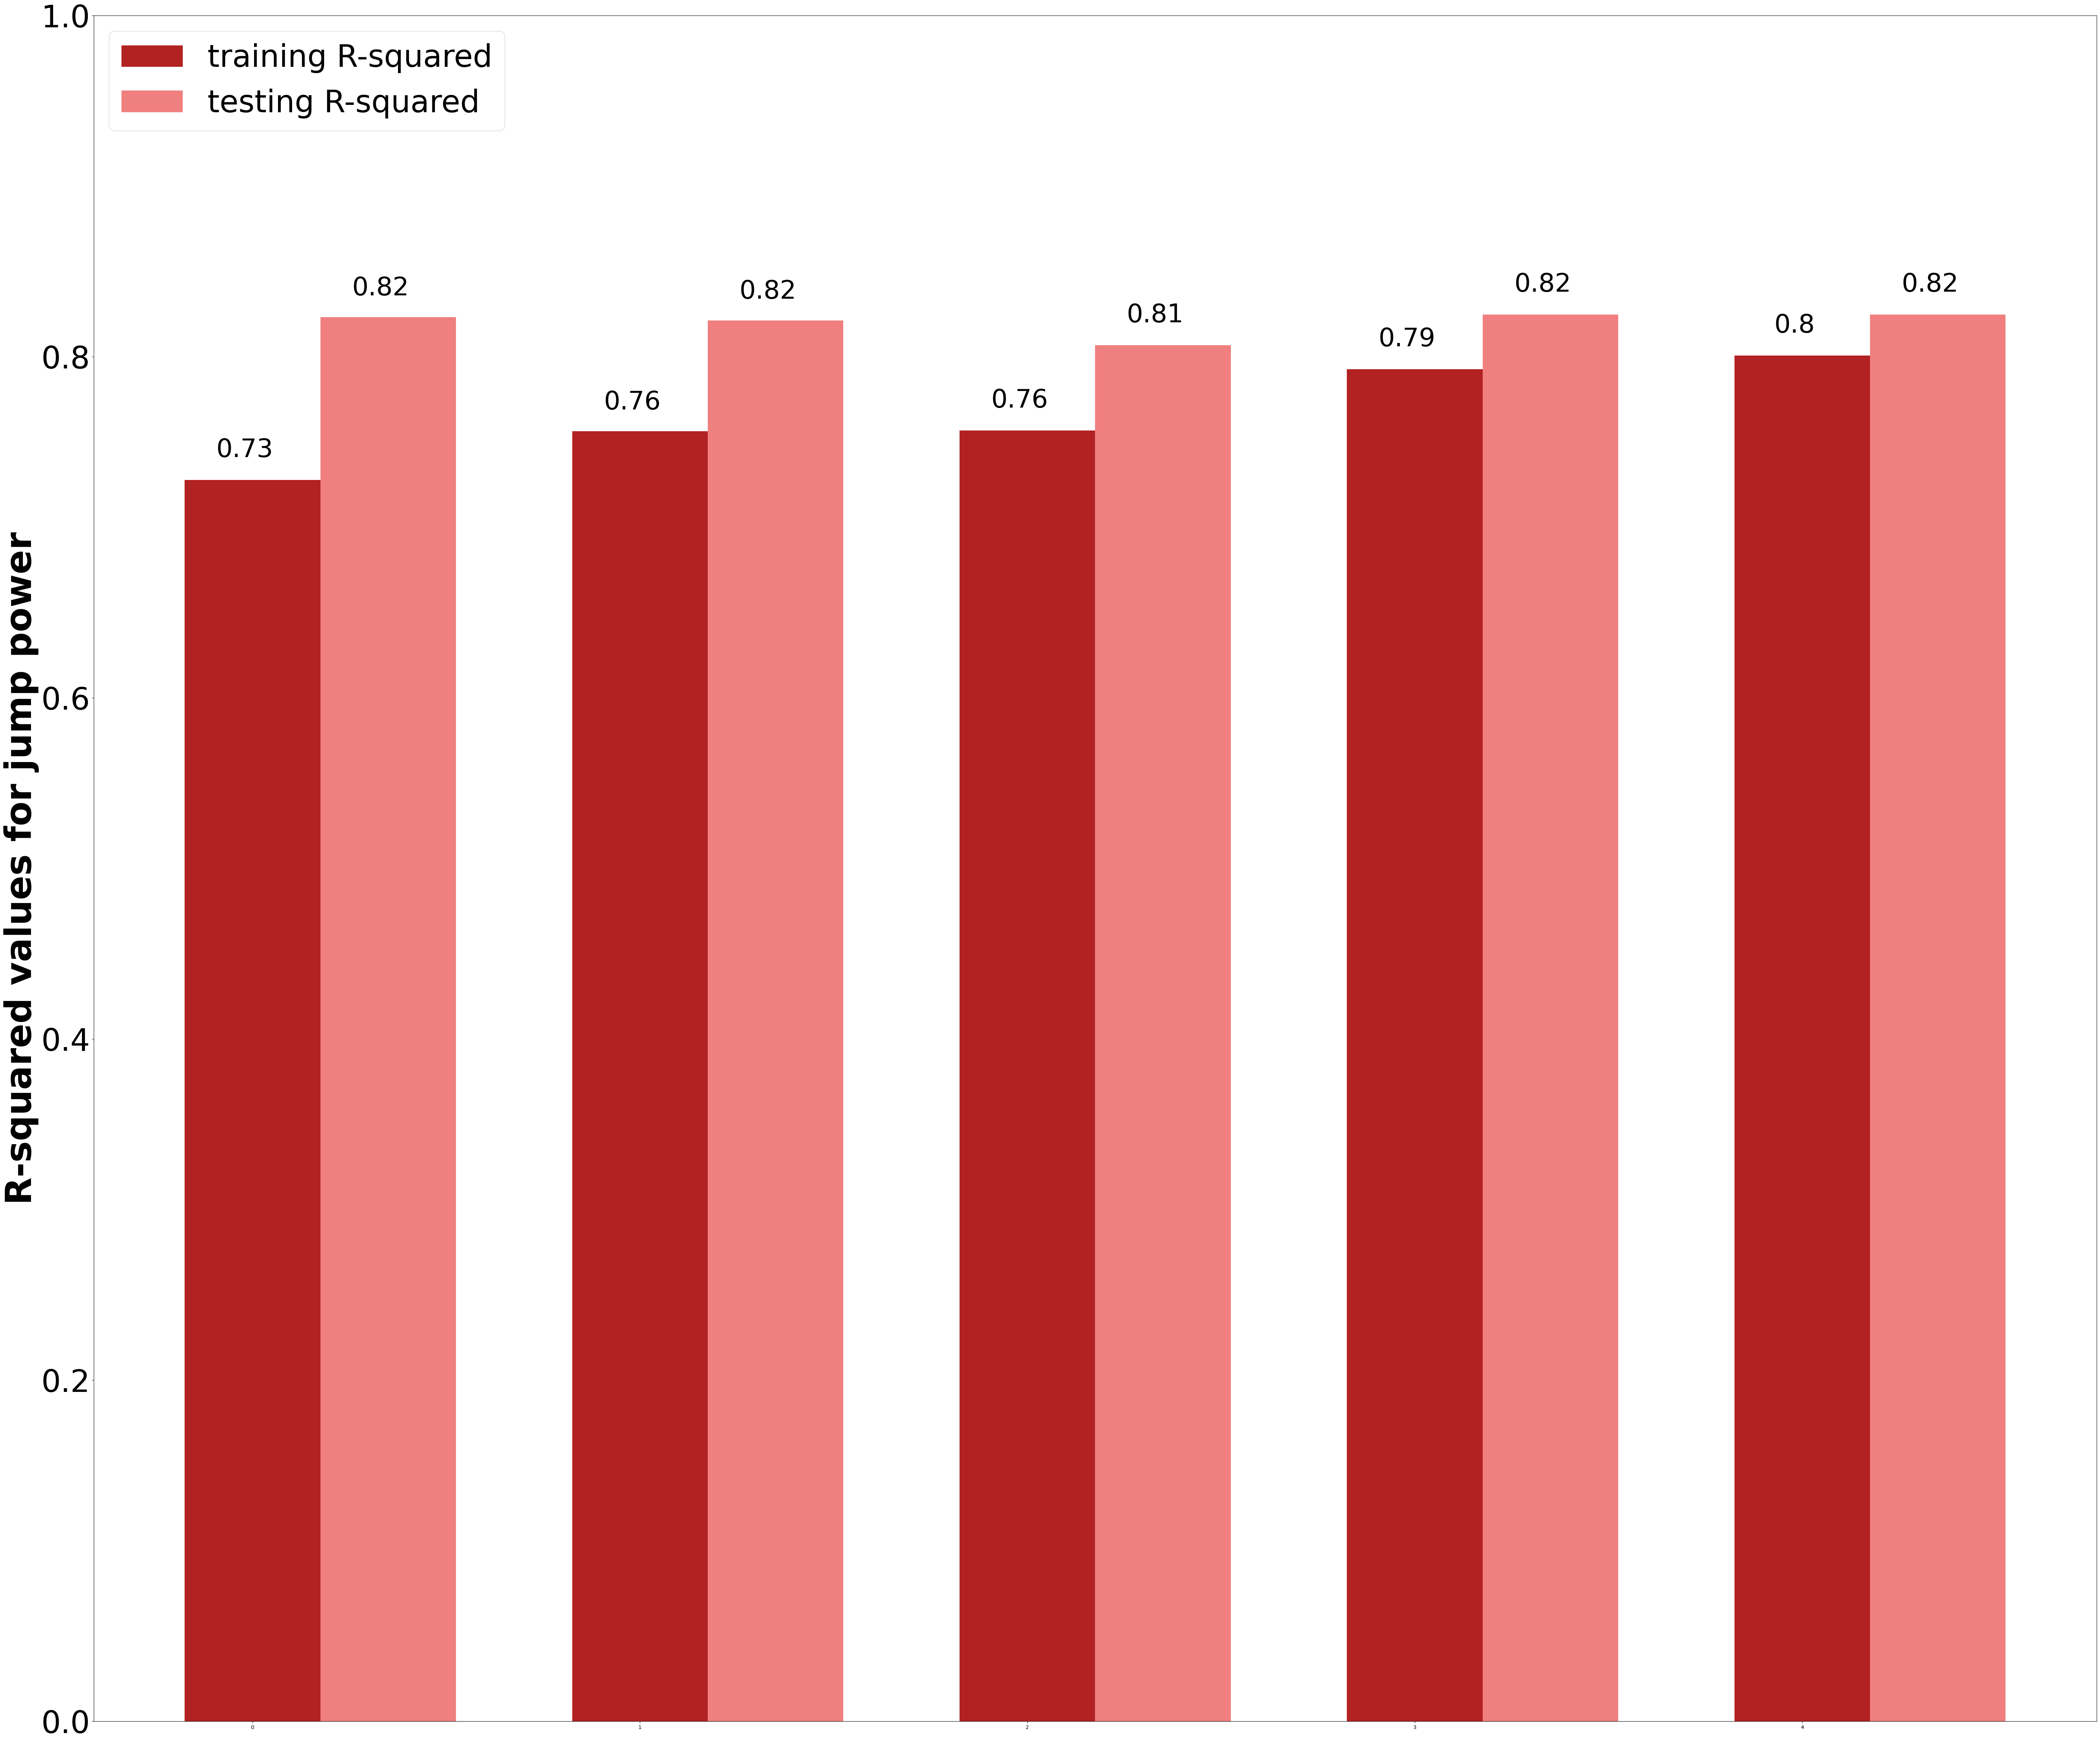

In [282]:
#LASSO

import numpy as np
import matplotlib.pyplot as plt

# Sample R-squared values for training and testing data for MLR models
lasso_train_r2 = [r2_train_23, r2_train_24,r2_train_26, r2_train_29, r2_train_30]
lasso_test_r2 = [r2_test_23, r2_test_24, r2_test_26, r2_test_29, r2_test_30]

# Model names or labels for each MLR model (optional)
model_names = ['DXA: Jump Power (Legs)', 'DXA: Jump Power (TB)', 'BIS: Jump Power', 'Combo: Jump Power (Legs)', 'Combo: Jump Power (TB)']

# Bar plot settings
bar_width = 0.35
index = np.arange(len(model_names))

# Plotting the R-squared values for training and testing data for MLR models
plt.figure(figsize=(70, 60))  # Adjust the figure size if needed

# Create bar plots for training and testing data
plt.bar(index, lasso_train_r2, width=bar_width, label='training R-squared', color='firebrick')
plt.bar(index + bar_width, lasso_test_r2, width=bar_width, label='testing R-squared', color='lightcoral')

# Add data labels (optional)
for i, name in enumerate(model_names):
    plt.text(index[i] - 0.02, round(lasso_train_r2[i], 3) + 0.01, round(lasso_train_r2[i], 2), fontsize=50, ha='center', va='bottom')
    plt.text(index[i] + bar_width - 0.02, round(lasso_test_r2[i], 3) + 0.01, round(lasso_test_r2[i], 2), fontsize=50, ha='center', va='bottom')

# X-axis and Y-axis labels, and title
#plt.xlabel('LASSO Models', fontweight = 'bold', fontsize = 70)
plt.ylabel('R-squared values for jump power', fontweight = 'bold', fontsize = 70)
#plt.title('R-Squared Values for LASSO Models on Training and Testing Data', fontweight = 'bold', fontsize = 80)
plt.ylim(0, 1)

# X-axis tick labels with increased font size
#plt.xticks(index + bar_width / -2.5, model_names, rotation = 50, fontsize=70)

# Y-axis tick labels with increased font size
plt.yticks(fontsize=60)

# Show the legend
plt.legend(loc='upper left', fontsize = 60)

# Show the plot
#plt.tight_layout()
plt.show()

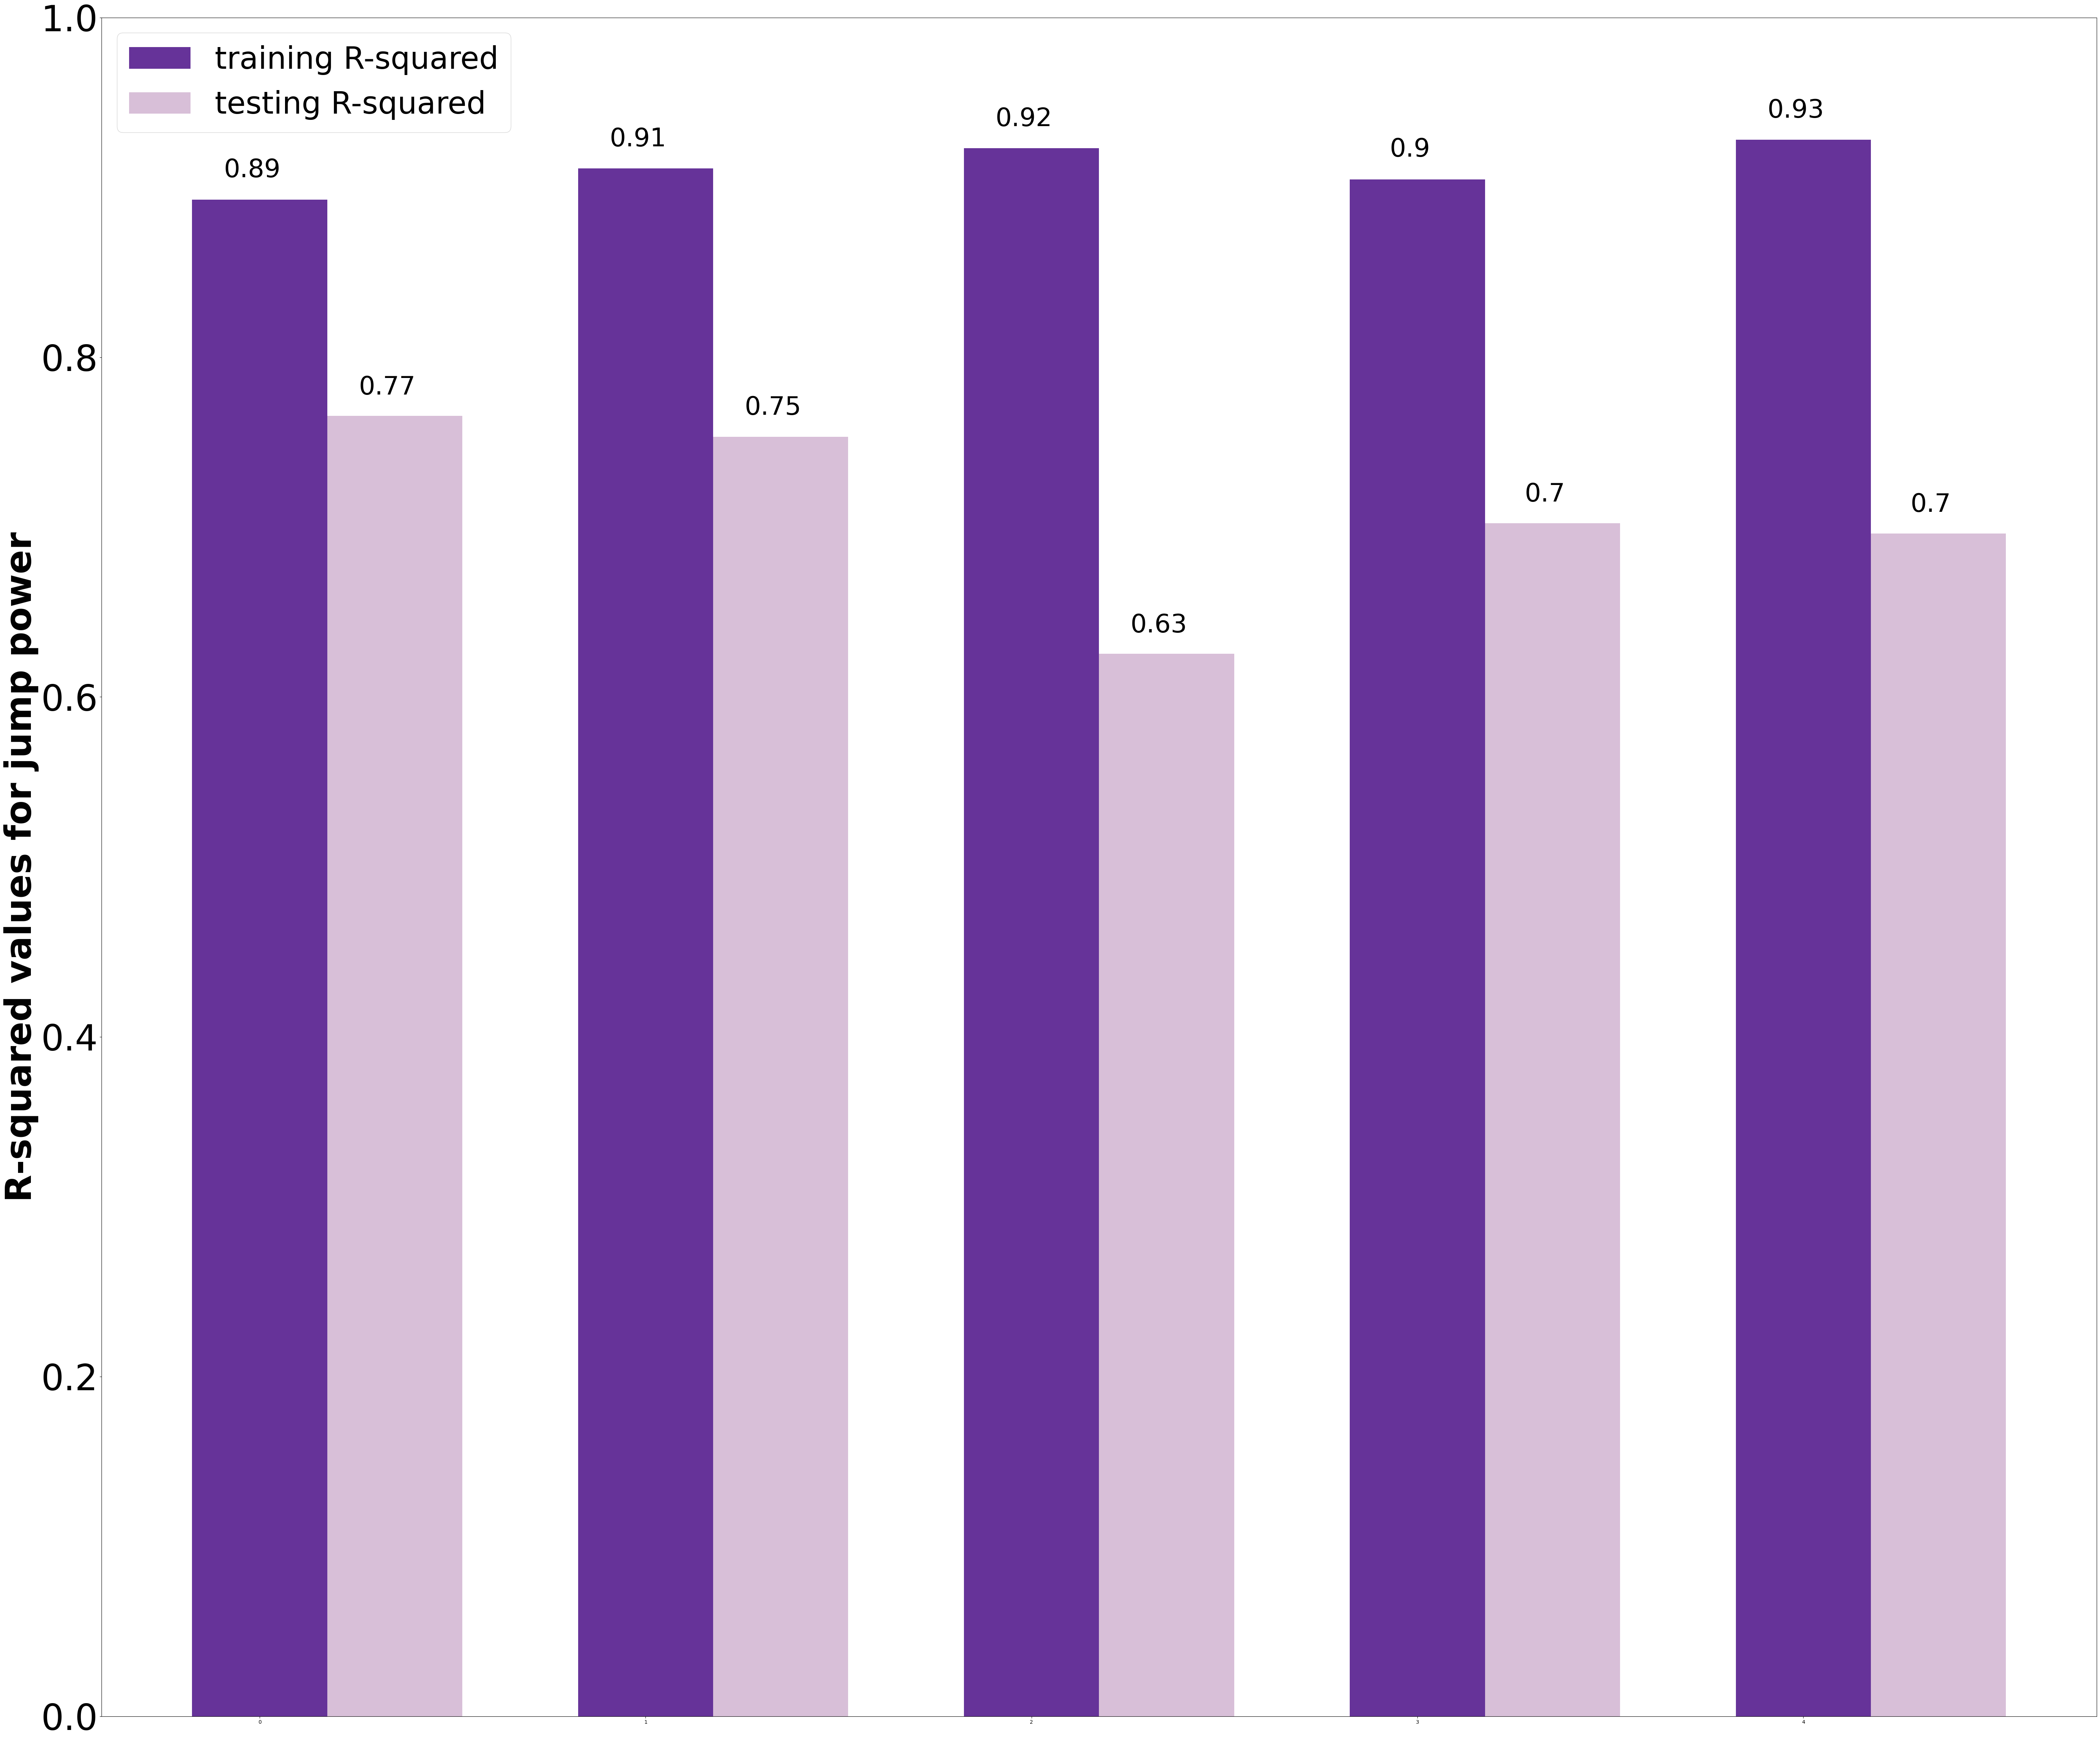

In [280]:
#Random Forest

import numpy as np
import matplotlib.pyplot as plt

# Sample R-squared values for training and testing data for MLR models
rf_train_r2 = [r2_train_13, r2_train_14, r2_train_16, r2_train_19, r2_train_20]
rf_test_r2 = [r2_test_13, r2_test_14, r2_test_16, r2_test_19, r2_test_20]

# Model names or labels for each MLR model (optional)
model_names = ['DXA: Jump Power (Legs)', 'DXA: Jump Power (TB)', 'BIS: Jump Power', 'Combo: Jump Power (Legs)', 'Combo: Jump Power (TB)']

# Bar plot settings
bar_width = 0.35
index = np.arange(len(model_names))

# Plotting the R-squared values for training and testing data for MLR models
plt.figure(figsize=(70, 60))  # Adjust the figure size if needed

# Create bar plots for training and testing data
plt.bar(index, rf_train_r2, width=bar_width, label='training R-squared', color='rebeccapurple')
plt.bar(index + bar_width, rf_test_r2, width=bar_width, label='testing R-squared', color='thistle')

# Add data labels (optional)
for i, name in enumerate(model_names):
    plt.text(index[i] - 0.02, round(rf_train_r2[i], 3) + 0.01, round(rf_train_r2[i], 2), fontsize=50, ha='center', va='bottom')
    plt.text(index[i] + bar_width - 0.02, round(rf_test_r2[i], 3) + 0.01, round(rf_test_r2[i], 2), fontsize=50, ha='center', va='bottom')

# X-axis and Y-axis labels, and title
#plt.xlabel('Random Forest Models', fontweight = 'bold', fontsize = 70)
plt.ylabel('R-squared values for jump power', fontweight = 'bold', fontsize = 70)
#plt.title('R-Squared Values for Random Forest Models on Training and Testing Data', fontweight = 'bold', fontsize = 80)
plt.ylim(0, 1)

# X-axis tick labels
#plt.xticks(index + bar_width / 3, model_names, rotation = 50, fontsize = 70)
# Set xtick positions and labels
xtick_positions = index  # Use the original x positions
#xtick_labels = model_names

#plt.xticks(xtick_positions, xtick_labels, fontweight = 'bold')

# Y-axis tick labels with increased font size
plt.yticks(fontsize=70)

# Show the legend
plt.legend(loc='upper left', fontsize = 60)

# Show the plot
#plt.tight_layout()
plt.show()
